# LATAR BELAKANG
Sebuah perusahaan yang menjual produk SAAS( software as a service) perusahaan ini memiliki data penjualan di area benua amerika, eropa dan asia. Di antara banyaknya data ada  beberapa negara yang mendapatkan profit dengan laba negative. Hal ini membuat pemilik saham khawatir dan meminta kita untuk membuat 

# Masalah 
perusahaan ingin meningkatkan laba di negara australia yang memiliki laba negatif dibandingkan dengan  negara lain, maka kita harus meningkatkan laba dengan melihat beberapa faktor lain seperti korelasi dengan quantitas, sales dan diskon lalu melihat perspektive lain seperti daftar-daftar produk, customer, segmentasi dan industri yang berpengaruh terhadap laba di wilayah australia

# GOALS
A.semenjak tujuan kita adalah menaikkan laba australia secara keseluruhan maka kita mempunyai beberapa tujuan" Yaitu:
1. meningkatkan laba dari sektor pelanggan
2. meningkatkan laba dari sektor produk
3. meningkatkan laba dari sektor kota
4. meningkatkan laba dari sektor segmen
5. meningkatkan laba dari sektor industri

In [93]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from  tabulate import  tabulate
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer
import tabulate  
import datetime 
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose





# Data Understanding: Atribut/Kolom

untuk menjawab pertanyaan di atas kita akan menggunan dataset SAAS-Sales.csv. Di sini kita akan mendapat 

In [94]:
import pandas as pd

# Load the dataset
file_path = 'SaaS-Sales.csv'
data = pd.read_csv(file_path)

# Show basic information about the dataset and the first few rows
data_info = data.info()
first_few_rows = data.head()

data_info, first_few_rows
data_australia = data[data['Country'] == 'Australia']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

# keterangan 
Berikut adalah rincian kolom yang ada dalam dataset:

ada 9994 baris dan 19 kolom dengan tipe data: float(3 kolom) integer ( 4 kolom), object (12 kolom)

Row ID: ID unik untuk setiap baris. 

Order ID: ID unik untuk setiap pesanan. 

Order Date: Tanggal pesanan dilakukan.

Date Key: Kunci tanggal yang mungkin digunakan untuk join dengan tabel lain.

Contact Name: Nama kontak pelanggan.

Country: Negara tempat pelanggan berada.

City: Kota tempat pelanggan berada.

Region: Wilayah geografis.

Subregion: Sub-wilayah geografis.

Customer: Nama pelanggan.

Customer ID: ID unik pelanggan.

Industry: Industri tempat pelanggan beroperasi.

Segment: Segmentasi pasar pelanggan.

Product: Produk yang dibeli.

License: Kode lisensi untuk produk.

Sales: Total penjualan (dalam USD).

Quantity: Jumlah unit yang dibeli.

Discount: Diskon yang diberikan pada penjualan.

Profit: Profit yang dihasilkan dari penjualan.

# Data cleaning and data distribution

sebelum kita mulai analisis haruslah kita membersihkan dataset kita agar kita bisa mendapatkan data yang baik dan membuat analisis yang lebih akurat. dalam tahap pertama yang kita lakukan di sini mengkonversi tanggal

# mengkonversi tanggal 
salah satu hal yang saya temukan saat melakukan pembersihan data adalah adanya semacam eror kecil berupa yang berupa format tanggal yang salah. untuk itu agar lebih praktis bentuk datanya  akan kita lebih ubah menjadi tipe orderdate. ini nantinya data juga bisa dipakai untuk melakukan analisat timeframe

In [3]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

order_date_dtype = data['Order Date'].dtype

order_date_dtype

dtype('<M8[ns]')

In [4]:
data_dropped.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

order date sudah menjadi tipe datetime.

# menghapus order masa depan
salah satu keunikan data di sini adalah ada order yang terjadi di masa depan di mana hal itu merupakan anomali karena pendapatan atau kerugian yang didapat di masa depan adalah [pendapatan yang ditangguhkan](https://www.investopedia.com/terms/d/deferredrevenue.asp)
 dam masuk dalam kategori liabilitas sehingga tidak bisa masuk dalam profit. 

In [5]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
jumlah_data_di_atas_tanggal_25 = len(data[data['Order Date'] > '2023-10-25'])

jumlah_data_di_atas_tanggal_25

978

di sini kita batasi pakai tanggal 25 yang merupakan hari dimana order terakhir diterima dan terdapat 978 tanggal di dataset. Namun, semenjak fokus kita di australia kita akan mencoba mengkerutkannya ke satu negara

In [6]:
data_australia['Order Date'] = pd.to_datetime(data_australia['Order Date'], errors='coerce')
jumlah_data_di_atas_tanggal_25_data_australia = len(data_australia[data_australia['Order Date'] > '2023-10-25'])

jumlah_data_di_atas_tanggal_25_data_australia

38

ada 38 negara sekarang kita akan menghapus semua data dengan order di masa depan termasuk data australia

In [45]:
# Convert the 'Order Date' column to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')


# Mengidentifikasi indeks baris yang memiliki tanggal setelah 25 Oktober 2023
indeks_untuk_dihapus = data[data['Order Date'] > '2023-10-25'].index

# Menghapus baris-baris tersebut menggunakan metode .drop()
data_dropped = data.drop(indeks_untuk_dihapus)

# Showing the number of rows before and after the filtering
rows_before = data.shape[0]
rows_after = filtered_data.shape[0]
rows_removed = rows_before - rows_after

rows_before, rows_after, rows_removed


(9994, 9016, 978)

kita telah menghapus data sebanyak 978 data dan tersisa 9016. sekarang kita fokus ke data 

In [58]:
# Memfilter data yang telah dibersihkan untuk memfokuskan pada Australia
data_australia_cleaned = data_dropped[data_dropped['Country'] == 'Australia']

# Menampilkan informasi dari data yang berkaitan dengan Australia dan beberapa baris pertamanya
data_australia_cleaned_info = data_australia_cleaned.info()
data_australia_cleaned_head = data_australia_cleaned.head()



<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, 41 to 9922
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        454 non-null    int64         
 1   Order ID      454 non-null    object        
 2   Order Date    454 non-null    datetime64[ns]
 3   Date Key      454 non-null    int64         
 4   Contact Name  454 non-null    object        
 5   Country       454 non-null    object        
 6   City          454 non-null    object        
 7   Region        454 non-null    object        
 8   Subregion     454 non-null    object        
 9   Customer      454 non-null    object        
 10  Customer ID   454 non-null    int64         
 11  Industry      454 non-null    object        
 12  Segment       454 non-null    object        
 13  Product       454 non-null    object        
 14  License       454 non-null    object        
 15  Sales         454 non-null    float64      

data area australia adalah 454 

# OUTLIER DAN PENANGANANNYA 

outlier  adalah suatu atau sekelompok nilai yang menyimpang jauh dari nilai normal dan dianggap sebagai anomali di sini kita akan menganalis menggunakan metode IQR

In [59]:
# Step 2: Identifikasi Outlier

# Fungsi untuk mengidentifikasi outlier menggunakan metode IQR
def identify_outliers_iqr(data, columns):
    outlier_dict = {}
    for column in columns:
        Q1 = np.percentile(data_dropped[column], 25)
        Q3 = np.percentile(data_dropped[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data_dropped[(data_dropped[column] < lower_bound) | (data_dropped[column] > upper_bound)]
        outlier_dict[column] = outliers.shape[0]
    
    return outlier_dict

# Kolom numerik yang akan diperiksa outlier-nya
numeric_columns = ['Sales', 'Quantity', 'Discount', 'Profit']

# Identifikasi outlier
outlier_counts = identify_outliers_iqr(data_dropped, numeric_columns)
outlier_counts


{'Sales': 1048, 'Quantity': 149, 'Discount': 774, 'Profit': 1700}

dari dataset ada sekitar 1048 outliers untuk sales, 149 untuk quantity, 774 untuk discount dan 1700 untuk profit.

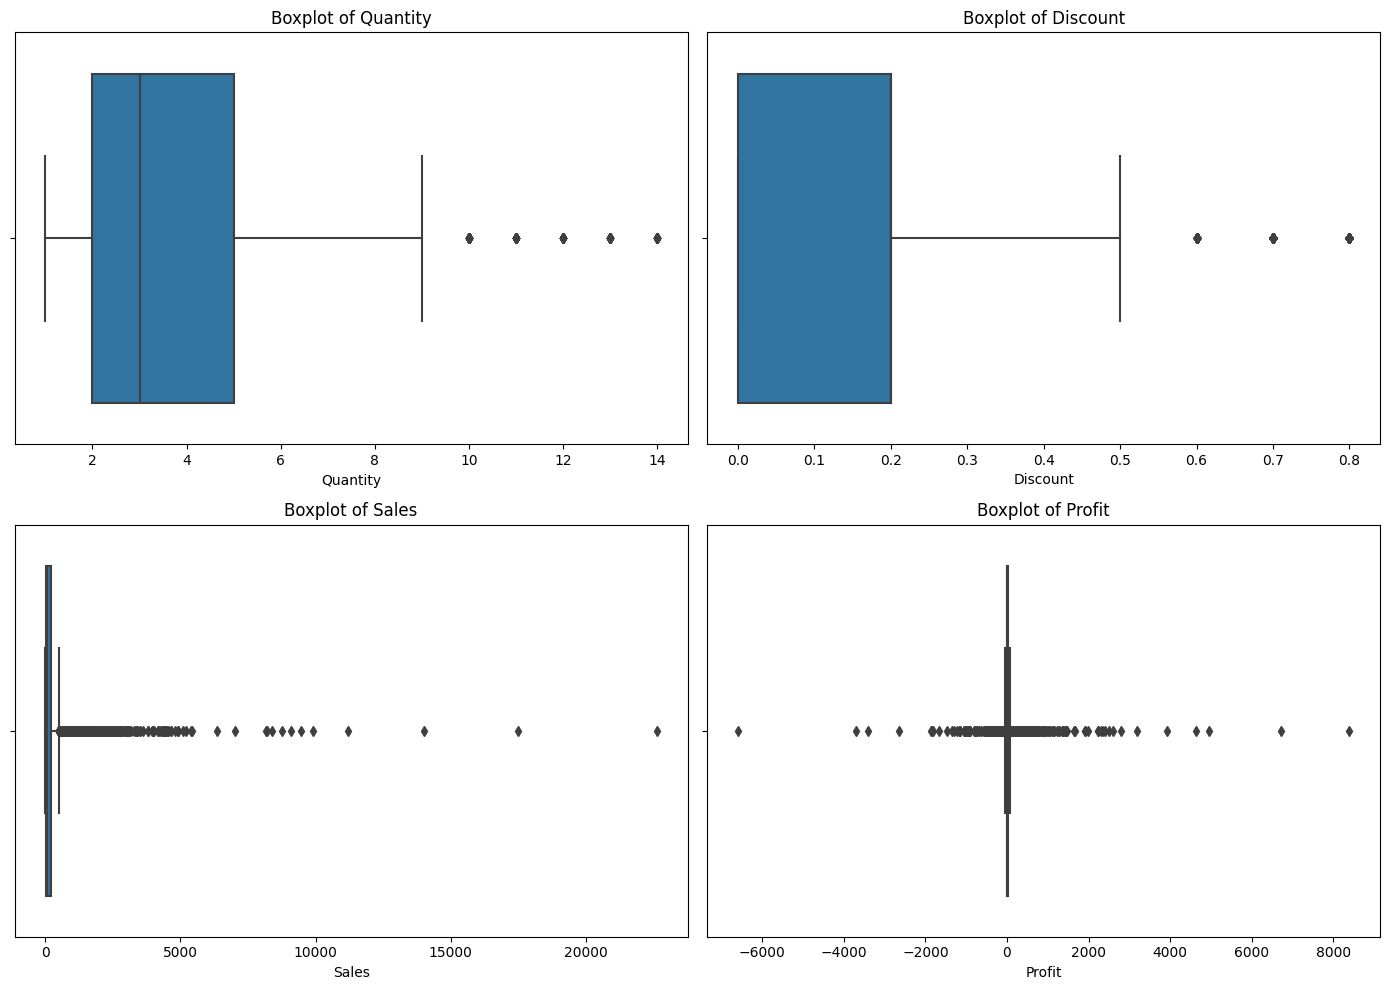

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns


# Identifying outliers: For numerical columns, we can use boxplots
numerical_columns = data_dropped.select_dtypes(include=['float64', 'int64']).columns

# Boxplot Visualization for 'Quantity', 'Discount', 'Sales', and 'Profit'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Boxplot for 'Quantity'
sns.boxplot(x=data_dropped['Quantity'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Quantity')

# Boxplot for 'Discount'
sns.boxplot(x=data_dropped['Discount'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Discount')

# Boxplot for 'Sales'
sns.boxplot(x=data_dropped['Sales'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Sales')

# Boxplot for 'Profit'
sns.boxplot(x=data_dropped ['Profit'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Profit')

plt.tight_layout()
plt.show()




Sales/pendapatan kotor: mayoritas dari penjualan dikelompokkan di bagian bawah, dengan beberapa di antaranya terdapat nilai penjualan yang tinggi. ini cukup umum di kebanyakan bisnis, dimana banyak transaksi yang bernilai kecil lebih sering terjadi daripada yang berjumlah lebih besar.

quantity: kebanyakan pesanan berada di atas 10, menunjukkan kebanyakan pesanan memiliki jumlah  barang lebih banyak

diskon: kebanyakan pesanan tidak memiliki atau hanya memiliki sedikit diskon. akan tetapi ada beberapa pesanan memiliki diskon lebih dari 50 persen

laba/pendapatan bersih: labanya tersebar, tetapi bisa diambil kesimpulan beberapa pesanan menghasilkan kerugian.namun dalam dunia SAAS yang biasanya dalam berbentuk start up hal seperti ini terjadi. 

untuk dapat melihat pattern outlier dengan lebih jelas kita akan mencoba menggunakan data timeframe untuk melihat pergerakannya dari waktu ke waktu

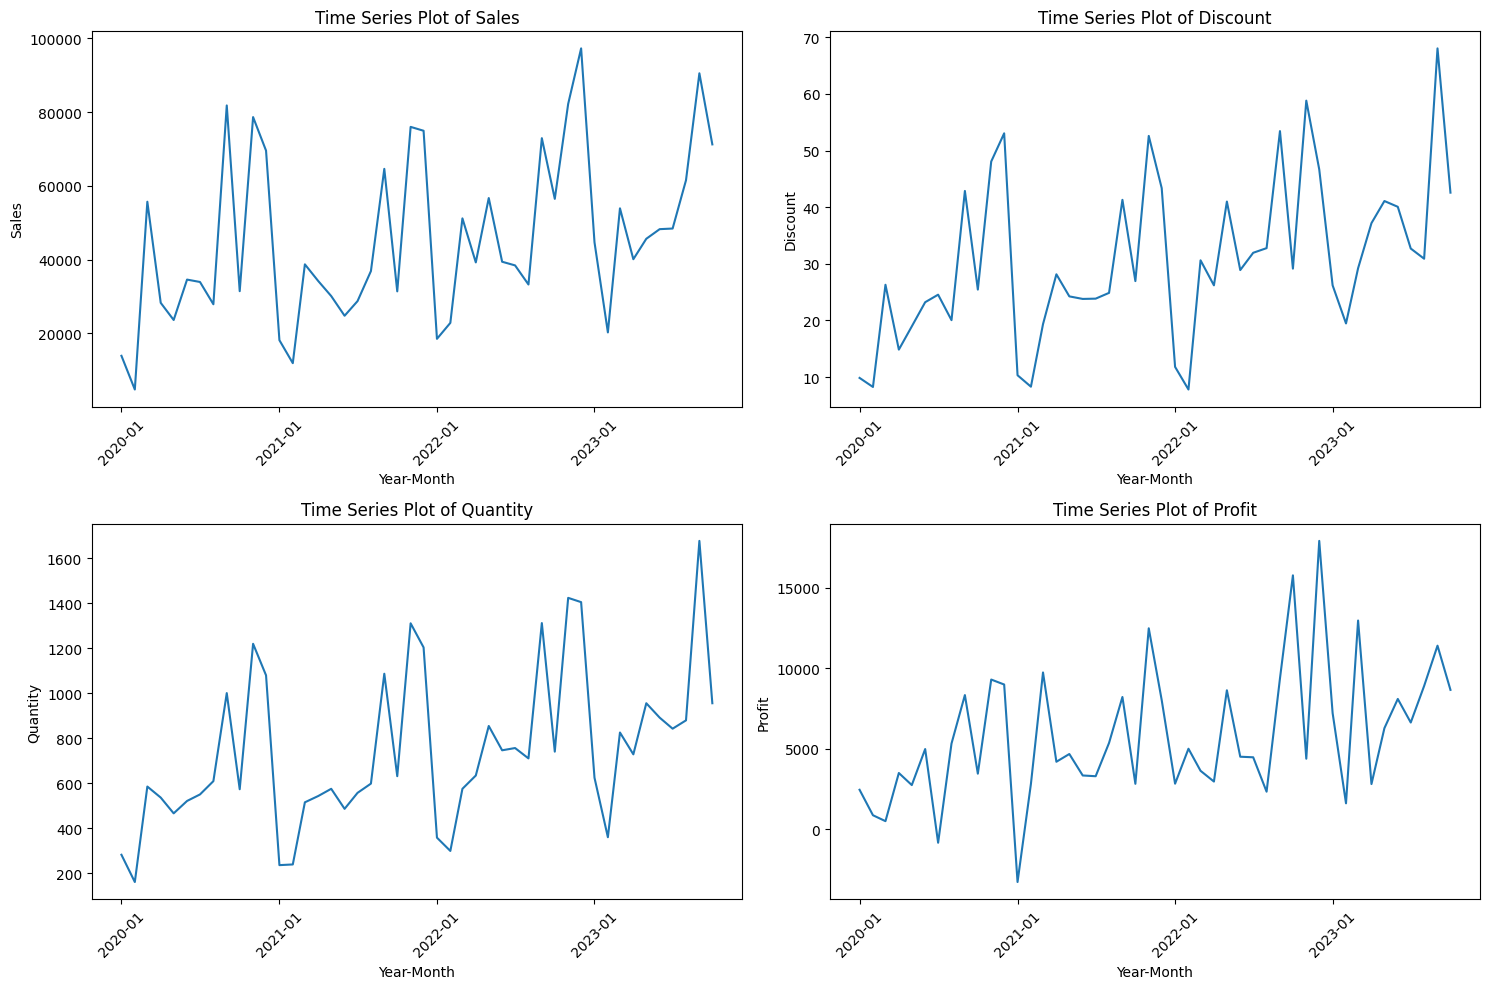

In [62]:
# Importing necessary library for date formatting
import matplotlib.dates as mdates

# Extract year and month from 'Order Date'
data_dropped['YearMonth'] = data_dropped['Order Date'].dt.to_period('M')

# Group by 'YearMonth' and calculate sum for numerical columns
grouped_data = data_dropped.groupby('YearMonth').agg({
    'Sales': 'sum',
    'Discount': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum'
}).reset_index()

# Convert 'YearMonth' to datetime for plotting
grouped_data['YearMonth'] = grouped_data['YearMonth'].dt.to_timestamp()

# Create line plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Sales', 'Discount', 'Quantity', 'Profit'], 1):
    plt.subplot(2, 2, i)
    sns.lineplot(x='YearMonth', y=col, data=grouped_data)
    plt.title(f'Time Series Plot of {col}')
    plt.xlabel('Year-Month')
    plt.ylabel(col)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()




dalam timeframe ini terlihat bahwa outlier quantity, diskon dan sales memiliki pola yang sama. Ini artinya ketiga variable ini ini dan saling berkorelasi  berkesinambungan. saat diskon menjadi saat momen di mana banyak orang membeli barang dalam penjualan banyak yang mengakibatkan pendapatan kotor alias sales meningkat

Untuk bagian profit agak berbeda di mana punya patern sendiri di mana ada kenaikan signifikan pada 2021 awal ke ke pertengahan trimester 1 lalu pada akhir 2022 hingga trimester 2023 terjadi fluktuatif ekstrim lalu nilai bisa negative karena  [ada banyak cost lain](https://www.linkedin.com/pulse/saas-companies-profitable-perfectpeoplesearch/.)  yang biasanya dipakai oleh perusahaan SAAS baik yang biasa ataupun startup. selain itu anomali profit perlu bagan operating income di mana hal ini tidak ditampikan di sini sehingga cukup diasumsikan bahwa ada dataset lain yang menyimpan data perhitungan profit. 



# outlier khusus australia

semenjak di sini akan dibahas tentang outlier dari daerah australia, akan lebih baik fokus ke outlier di area tersebut. pertama-tama kita coba akan menganalisa lebih detil dengan menggunakan z method. Metode Z dapat dipakai untuk menentukan sejauh mana setiap titik data berjarak dari rata-rata populasi dan mengukur sejauh mana titik tersebut berbeda dari data umum.

In [63]:
from scipy.stats import zscore

# Menghitung skor Z untuk 'Sales', 'Profit', 'Quantity', dan 'Discount'
data_australia_cleaned['Z_Sales'] = zscore(data_australia_cleaned['Sales'])
data_australia_cleaned['Z_Profit'] = zscore(data_australia_cleaned['Profit'])
data_australia_cleaned['Z_Quantity'] = zscore(data_australia_cleaned['Quantity'])
data_australia_cleaned['Z_Discount'] = zscore(data_australia_cleaned['Discount'])

# Menampilkan data dengan skor Z untuk 'Sales', 'Profit', 'Quantity', dan 'Discount'
data_australia[['Sales', 'Z_Sales', 'Profit', 'Z_Profit', 'Quantity', 'Z_Quantity', 'Discount', 'Z_Discount']].head()



,Sales,Z_Sales,Profit,Z_Profit,Quantity,Z_Quantity,Discount,Z_Discount
41,147.168,-0.049783,16.5564,0.240332,4,0.116228,0.2,-0.776085
66,213.115,0.158383,-15.2225,0.059272,5,0.581142,0.3,-0.367707
84,230.376,0.212868,-48.9549,-0.132917,3,-0.348685,0.2,-0.776085
99,64.624,-0.310338,22.6184,0.274870,7,1.510970,0.2,-0.776085
100,95.976,-0.211373,-10.7973,0.084485,3,-0.348685,0.2,-0.776085


kita akan menggunakan 3 atau -3 sebagai comon threesholds

In [67]:
# Calculating Z-scores for 'Profit', 'Discount', 'Sales', and 'Quantity'
data_australia_cleaned['Z_Profit'] = zscore(data_australia_cleaned['Profit'], nan_policy='omit')
data_australia_cleaned['Z_Discount'] = zscore(data_australia_cleaned['Discount'], nan_policy='omit')
data_australia_cleaned['Z_Sales'] = zscore(data_australia_cleaned['Sales'], nan_policy='omit')
data_australia_cleaned['Z_Quantity'] = zscore(data_australia_cleaned['Quantity'], nan_policy='omit')

# Identifying global outliers
outliers_profit = data_australia_cleaned[(data_australia_cleaned['Z_Profit'] > 3) | (data_australia_cleaned['Z_Profit'] < -3)]
outliers_discount = data_australia_cleaned[(data_australia_cleaned['Z_Discount'] > 3) | (data_australia_cleaned['Z_Discount'] < -3)]
outliers_sales = data_australia_cleaned[(data_australia_cleaned['Z_Sales'] > 3) | (data_australia_cleaned['Z_Sales'] < -3)]
outliers_quantity = data_australia_cleaned[(data_australia_cleaned['Z_Quantity'] > 3) | (data_australia_cleaned['Z_Quantity'] < -3)]

# Displaying the number of outliers in each category
outliers_summary = {
    'Profit': len(outliers_profit),
    'Discount': len(outliers_discount),
    'Sales': len(outliers_sales),
    'Quantity': len(outliers_quantity)
}

outliers_summary


{'Profit': 13, 'Discount': 0, 'Sales': 8, 'Quantity': 5}

Khusus australia data yang berupa global outlier adalah sebagai berikut:
 5 outlier untuk quantitas dan profit sedangkan sales ada 9. diskon sama sekali tidak ada outlier

 Kemudian kita akan melihat setiap outlier secara detail di bawah ini.

In [65]:
# Displaying details of outlier transactions for 'Profit'
outliers_profit[['Order Date', 'Product', 'Sales', 'Quantity', 'Discount', 'Profit', 'Z_Profit']].sort_values(by='Z_Profit', ascending=False)


,Order Date,Product,Sales,Quantity,Discount,Profit,Z_Profit
3055,2021-08-28,Alchemy,2799.960,5,0.2,874.9875,7.444065
6200,2021-04-16,Alchemy,1439.968,4,0.2,485.9892,4.210748
487,2020-10-29,Site Analytics,2735.952,6,0.2,341.9940,3.013874
9164,2021-06-08,OneView,143.128,2,0.8,-393.6020,-3.100329
125,2020-09-20,ContactMatcher,617.700,6,0.5,-407.6820,-3.217360
1394,2023-10-10,ContactMatcher,652.450,5,0.5,-430.6170,-3.407994
8251,2021-03-05,OneView,180.980,5,0.8,-470.5480,-3.739897
3519,2021-06-22,ContactMatcher,796.425,7,0.5,-525.6405,-4.197820
9480,2020-09-07,ContactMatcher,304.990,5,0.8,-533.7325,-4.265080
8926,2022-01-30,ContactMatcher,626.100,3,0.5,-538.4460,-4.304258


In [68]:
# Displaying details of outlier transactions for 'Sales'
outliers_sales[['Order Date', 'Product', 'Sales', 'Quantity', 'Discount', 'Profit', 'Z_Sales']].sort_values(by='Z_Sales', ascending=False)


,Order Date,Product,Sales,Quantity,Discount,Profit,Z_Sales
3055,2021-08-28,Alchemy,2799.960,5,0.2,874.9875,8.311869
487,2020-10-29,Site Analytics,2735.952,6,0.2,341.9940,8.110030
8269,2023-01-31,Site Analytics,2003.168,4,0.2,250.3960,5.799317
1444,2022-05-24,Site Analytics,1979.928,9,0.2,148.4946,5.726034
6200,2021-04-16,Alchemy,1439.968,4,0.2,485.9892,4.023360
8924,2022-01-30,Site Analytics,1439.968,4,0.2,143.9968,4.023360
6764,2022-09-03,Big Ol Database,1362.900,3,0.3,-19.4700,3.780339
7606,2022-05-28,Marketing Suite - Gold,1297.368,9,0.2,97.3026,3.573695


In [69]:
# Displaying details of outlier transactions for 'Quantity'
outliers_quantity[['Order Date', 'Product', 'Sales', 'Quantity', 'Discount', 'Profit', 'Z_Quantity']].sort_values(by='Z_Quantity', ascending=False)


,Order Date,Product,Sales,Quantity,Discount,Profit,Z_Quantity
1045,2023-10-13,FinanceHub,254.604,14,0.3,-18.1860,4.732022
9515,2020-02-18,ChatBot Plugin,54.208,14,0.2,8.8088,4.732022
3242,2023-04-01,ContactMatcher,13.468,13,0.8,-22.8956,4.270113
9063,2020-10-14,Support,322.192,13,0.2,100.6850,4.270113
9895,2020-09-26,Data Smasher,153.824,11,0.2,38.4560,3.346296


tidak ada yang terlalu mencolok jadi dibiarkan saja anomalinya 

# JUMLAH data  duplikat 

In [95]:
duplicate_rows = data[data.duplicated()]

duplicate_rows_count = len(duplicate_rows)
print(f' jumlah baris duplikat = {duplicate_rows_count}')


 jumlah baris duplikat = 0


Tidak ada data duplikat yang perlu dibersihkan

# MISSING VALUE

In [96]:
# Check for missing values
missing_values = data.isnull().sum()

# Check data types
data_types = data.dtypes

missing_values, data_types


(Row ID          0
 Order ID        0
 Order Date      0
 Date Key        0
 Contact Name    0
 Country         0
 City            0
 Region          0
 Subregion       0
 Customer        0
 Customer ID     0
 Industry        0
 Segment         0
 Product         0
 License         0
 Sales           0
 Quantity        0
 Discount        0
 Profit          0
 dtype: int64,
 Row ID            int64
 Order ID         object
 Order Date       object
 Date Key          int64
 Contact Name     object
 Country          object
 City             object
 Region           object
 Subregion        object
 Customer         object
 Customer ID       int64
 Industry         object
 Segment          object
 Product          object
 License          object
 Sales           float64
 Quantity          int64
 Discount        float64
 Profit          float64
 dtype: object)

tidak ada missing value yang perlu ditambahi

# data bersih

Data yang dipakai adalah di australia 

In [97]:
# Menampilkan beberapa baris pertama dari data yang telah dibersihkan
data_australia_cleaned.info


<bound method DataFrame.info of       Row ID         Order ID Order Date  Date Key      Contact Name  \
41        42  APJ-2023-120999 2023-09-11  20230911      Karen Mathis   
66        67  APJ-2021-164175 2021-04-30  20210430       Eric McLean   
99       100  APJ-2022-158568 2022-08-30  20220830       Gavin Walsh   
100      101  APJ-2022-158568 2022-08-30  20220830       Gavin Walsh   
101      102  APJ-2022-158568 2022-08-30  20220830       Gavin Walsh   
...      ...              ...        ...       ...               ...   
9871    9872  APJ-2023-146269 2023-10-07  20231007   Theresa Cameron   
9872    9873  APJ-2023-146269 2023-10-07  20231007   Theresa Cameron   
9895    9896  APJ-2020-115049 2020-09-26  20200926   Faith Robertson   
9896    9897  APJ-2020-156342 2020-06-17  20200617    Justin Pullman   
9922    9923  APJ-2023-162124 2023-05-07  20230507  Caroline Burgess   

        Country        City Region Subregion                     Customer  \
41    Australia  Wollongon

sebelum dibersihkan kita memiliki 492 data untuk australia sedangkan sekarang memiliki 454 baris dengan 3 kolom tambahan

# Observations:
korelasi antara  discount and profit cukup lemah dan negativ −0.28),dan hal yang sama juga terjadi namun sedikit lebih lemah discount and sales (0.17)
kore (sales and profit) sangat lemah (-0,08).
Sales and quantity punya hubungan positif yang lemah (0.19)

# Distribusi Data

Distribusi data sangat penting untuk dipahami karena dapat memberikan wawasan tentang bentuk data dan hubungannya satu dengan yang lain.

Relasi Antar Kolom
1. Sales dan Profit: Kita ingin melihat bagaimana penjualan berhubungan dengan profit. Apakah penjualan yang lebih tinggi selalu menghasilkan profit yang lebih tinggi?
2. Discount dan Profit: Apakah pemberian diskon berpengaruh negatif terhadap profit?
3. Quantity dan Profit: Apakah ada korelasi antara jumlah unit yang dibeli dengan profit?
Langkah selanjutnya adalah menganalisis distribusi data dan hubungan antar kolom.

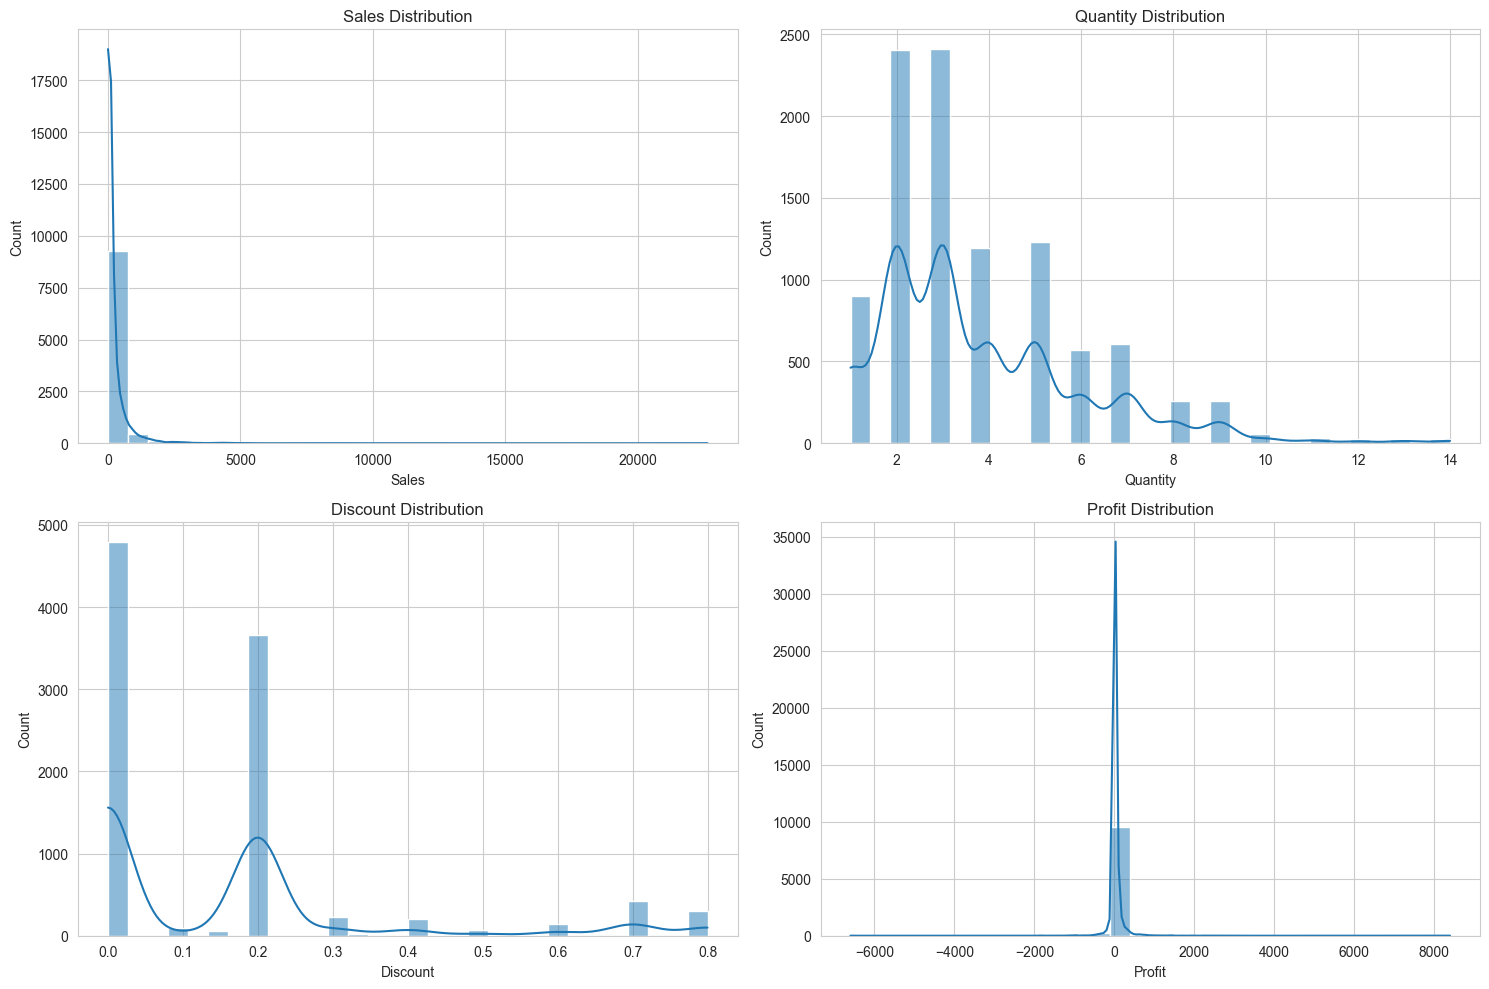

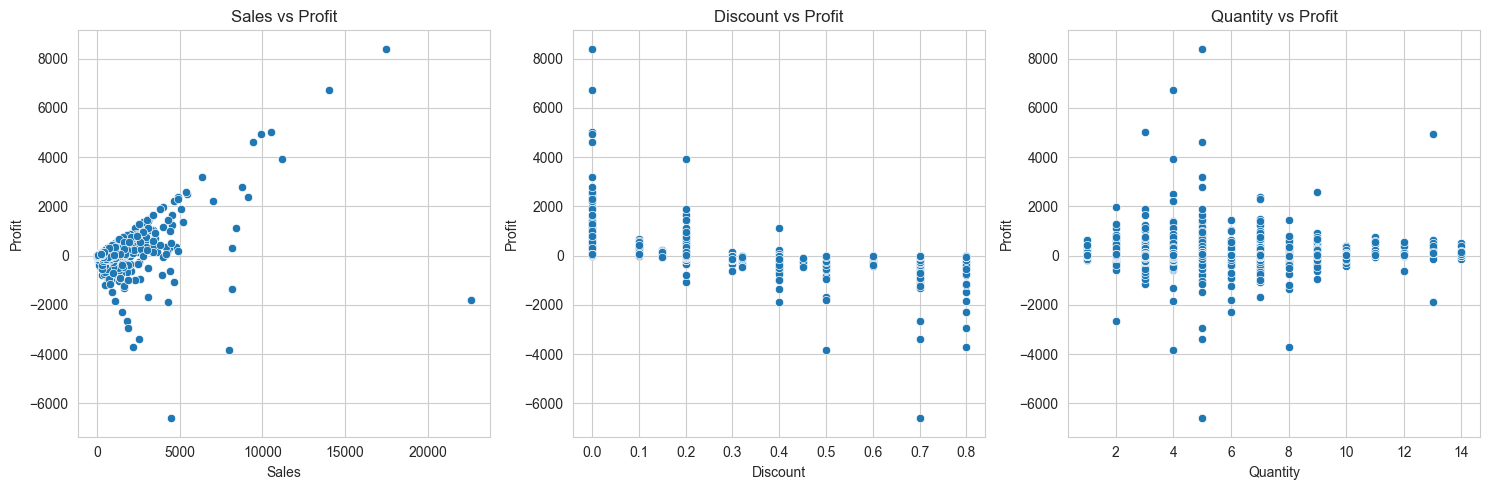

In [181]:
# Analyzing distribution of numerical data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Sales Distribution
sns.histplot(data['Sales'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Sales Distribution')

# Quantity Distribution
sns.histplot(data['Quantity'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Quantity Distribution')

# Discount Distribution
sns.histplot(data['Discount'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Discount Distribution')

# Profit Distribution
sns.histplot(data['Profit'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Profit Distribution')

plt.tight_layout()
plt.show()

# Analyzing relationships between columns
relationship_fig, relationship_axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Sales vs Profit
sns.scatterplot(x='Sales', y='Profit', data=data, ax=relationship_axes[0])
relationship_axes[0].set_title('Sales vs Profit')

# Discount vs Profit
sns.scatterplot(x='Discount', y='Profit', data=data, ax=relationship_axes[1])
relationship_axes[1].set_title('Discount vs Profit')

# Quantity vs Profit
sns.scatterplot(x='Quantity', y='Profit', data=data, ax=relationship_axes[2])
relationship_axes[2].set_title('Quantity vs Profit')

plt.tight_layout()
plt.show()


# Distribusi Data
Sales: Sebagian besar transaksi memiliki nilai penjualan yang relatif rendah, dengan beberapa transaksi yang memiliki nilai penjualan sangat tinggi. Distribusi ini sangat miring ke kanan.

Quantity: Sebagian besar transaksi melibatkan pembelian dalam jumlah yang kecil, dengan beberapa transaksi yang melibatkan jumlah yang sangat besar. 

Distribusi ini juga miring ke kanan.

Discount: Sebagian besar transaksi tidak memiliki diskon, tetapi ada beberapa transaksi dengan diskon yang signifikan.

Profit: Profit memiliki distribusi yang lebih simetris dibandingkan dengan kolom lainnya, tetapi masih ada beberapa nilai ekstrim di kedua sisi.

# Relasi Antar Kolom

Sales vs Profit: Ada hubungan positif antara penjualan dan profit, yang berarti transaksi dengan penjualan yang lebih tinggi cenderung menghasilkan profit yang lebih tinggi. Namun, ada beberapa transaksi dengan penjualan tinggi yang menghasilkan profit negatif atau profit yang sangat rendah, menunjukkan adanya faktor lain yang mempengaruhi profit.

Discount vs Profit: Tidak ada hubungan yang jelas antara diskon dan profit. Beberapa transaksi dengan diskon tinggi masih menghasilkan profit yang baik, sementara ada juga transaksi dengan diskon rendah yang menghasilkan profit negatif.

Quantity vs Profit: Mirip dengan penjualan, ada hubungan positif antara jumlah dan profit, tetapi hubungannya tidak sekuat antara penjualan dan profit.
Kesimpulan dan Langkah Selanjutnya

Sales dan Profit: Perusahaan mungkin perlu meninjau kembali harga dan biaya untuk produk-produk dengan penjualan tinggi tetapi profit rendah atau negatif.

Diskon: Pemberian diskon tidak selalu berdampak negatif terhadap profit. Perusahaan mungkin perlu mengoptimalkan strategi penetapan harga dan diskon.

Quantity dengan profit: Meningkatkan jumlah unit yang dibeli dalam satu transaksi dapat membantu meningkatkan profit, tetapi perlu diimbangi dengan pemahaman yang baik tentang biaya dan harga.

# DATA ANALISIS
kita mulai melihat perbandingan laba berdasarkan wilayah  negara australia

In [99]:
# grup berdasarkan daerah
regional_performance = data.groupby('Region').agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['sum', 'mean', 'count', lambda x: (x < 0).sum()],  # count for total transactions and lambda for losses
    'Discount': 'mean',
    'Quantity': 'sum'
})

# Rpenamaan kolom
regional_performance.columns = [
    'Total Sales', 'Average Sales', 
    'Total Profit', 'Average Profit', 'Total Transactions', 'Number of Loss Transactions', 
    'Average Discount', 
    'Total Quantity Sold'
]

regional_performance = regional_performance.sort_values(by='Total Sales', ascending=False)
regional_performance.reset_index(inplace=True)
regional_performance


,Region,Total Sales,Average Sales,Total Profit,Average Profit,Total Transactions,Number of Loss Transactions,Average Discount,Total Quantity Sold
0,EMEA,1.043887e+06,247.425223,147456.0450,34.950473,4219,702,0.141372,16033
1,AMER,8.378496e+05,228.608350,127426.9898,34.768619,3665,418,0.109359,13879
2,APJ,4.154642e+05,196.902484,11513.9869,5.456866,2110,751,0.267223,7961


In [101]:
apj_data = data[data['Region'] == 'APJ']

profit_by_country = apj_data.groupby('Country')['Profit'].sum().sort_values(ascending=False)

profit_by_country

Country
India          18382.9363
Philippines     9977.3748
China           7031.1788
South Korea     6785.5016
Singapore       4853.9560
New Zealand     1157.1161
Indonesia        836.4435
Taiwan           826.7231
Australia     -12607.8870
Japan         -25729.3563
Name: Profit, dtype: float64

terbukti negara  australia mengalami profit negatif dibanding dengan beberapa negara lainnya di wilayah "apj"

# statistik deskriptif  australia
sekarang kita akan menyimpulkan dataset kita secara ringkas menggunakan statistik deskriptif. variabel yang akan kita pakai adalah:
1. profit
2. discount
3. quantity
4. sales

alasan kenapa kita memakai 4 kolom tersebut karena mereka semua variabel numerik yang bisa dihitung dan bisa digunakan untuk menghitung di analisis nanti

In [74]:
# Menghitung statistik deskriptif untuk dataset Australia
descriptive_stats_australia = data_australia_cleaned[['Profit', 'Discount', 'Quantity', 'Sales']].describe()

# Menambahkan modus, skewness, dan kurtosis
mode_australia = data_australia_cleaned[['Profit', 'Discount', 'Quantity', 'Sales']].mode().loc[0]
skewness_australia = data_australia_cleaned[['Profit', 'Discount', 'Quantity', 'Sales']].skew()
kurtosis_australia = data_australia_cleaned[['Profit', 'Discount', 'Quantity', 'Sales']].kurtosis()

# Menambahkan statistik tambahan ke dataframe
descriptive_stats_australia.loc['mode'] = mode_australia
descriptive_stats_australia.loc['skewness'] = skewness_australia
descriptive_stats_australia.loc['kurtosis'] = kurtosis_australia

descriptive_stats_australia



,Profit,Discount,Quantity,Sales
count,454.000000,454.000000,454.000000,454.000000
mean,-20.603342,0.391850,3.755507,164.061233
std,120.442102,0.246476,2.167318,317.474525
min,-1143.891000,0.200000,1.000000,0.836000
25%,-18.238375,0.200000,2.000000,11.250000
50%,-2.161250,0.200000,3.000000,35.168000
75%,5.628200,0.600000,5.000000,180.724000
max,874.987500,0.800000,14.000000,2799.960000
mode,-10.173600,0.200000,2.000000,1.728000
skewness,-2.308062,0.767662,1.478923,4.262166


Skewness dan kurtosis menunjukkan bahwa distribusi beberapa variabel cenderung bersifat skew dan berat ekor

# Matrix korelasi australia 

dalam melakukan analisis statistik inferensial saya akan menggunakan matrix korelasi pearson

In [91]:
from scipy.stats import pearsonr

# Menghitung koefisien korelasi Pearson
correlation_profit_discount = pearsonr(australia_data['Profit'], australia_data['Discount'])
correlation_profit_quantity = pearsonr(australia_data['Profit'], australia_data['Quantity'])
correlation_profit_sales = pearsonr(australia_data['Profit'], australia_data['Sales'])

correlation_profit_discount, correlation_profit_quantity, correlation_profit_sales


(PearsonRResult(statistic=-0.3362698004523614, pvalue=1.8298401168397601e-13),
 PearsonRResult(statistic=-0.056687987280389325, pvalue=0.22800790677768845),
 PearsonRResult(statistic=0.16165236756000984, pvalue=0.0005449223870653185))

1.	Laba dan Diskon: −0.336−0.336 dengan p-value 1.83×10−131.83×10−13

•	Ini menunjukkan adanya korelasi negatif sedang antara laba dan diskon. Seiring meningkatnya diskon, laba cenderung menurun.

•	p-value yang sangat kecil menunjukkan bahwa hasil ini sangat signifikan secara statistik.

2.	Kuantitas Terjual dan Laba: −0.0567−0.0567 dengan p-value 0.2280.228

•	Ini menunjukkan adanya korelasi negatif yang sangat lemah dan tidak signifikan secara statistik antara kuantitas terjual dan laba.

3.	Harga Jual dan Laba: 0.16170.1617 dengan p-value 0.00050.0005

•	Ini menunjukkan adanya korelasi positif lemah antara harga jual dan laba. Seiring meningkatnya harga jual, laba juga cenderung meningkat, meskipun hubungan ini tidak sangat kuat.

•	p-value yang kecil menunjukkan bahwa hasil ini signifikan secara statistik.



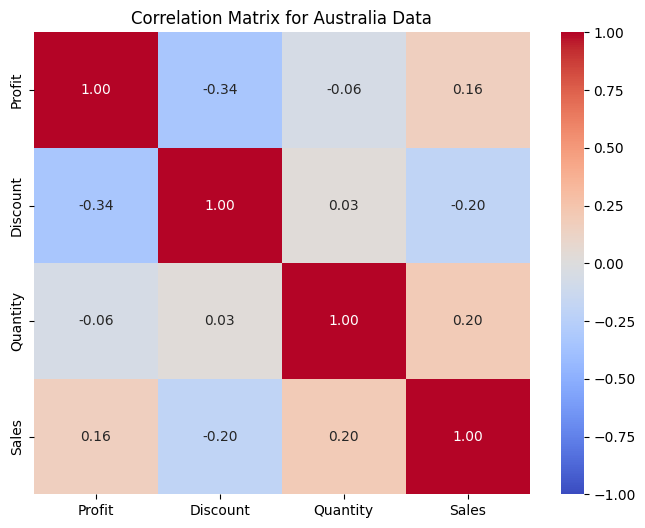

In [102]:

correlation_matrix = data_australia_cleaned[['Profit', 'Discount', 'Quantity', 'Sales']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Australia Data')
plt.show()


# observasi
1. Sales dan Profit: Korelasi negatif  rendah (0.16), menunjukkan bahwa tidak ada hubungan kuat antara penjualan dan keuntungan di Australia.
2. Sales dan Quantity: Korelasi positif sedang (0.20), menunjukkan hubungan yang sama lemah antara jumlah barang yang dijual dan total penjualan di Australia.
3. Sales dan Discount: Korelasi negatif sedang (-0.20), menunjukkan bahwa peningkatan diskon cenderung dikaitkan dengan penurunan total penjualan di Australia.
4. Profit dan Discount: Korelasi negatif kuat (-0.34), menunjukkan bahwa peningkatan diskon cenderung dikaitkan dengan penurunan keuntungan di Australia.
5. Quantity dan Profit: Korelasi negatif sangat rendah (-0.06), menunjukkan hubungan yang sangat lemah antara jumlah barang yang dijual dan keuntungan di Australia.
Dari hasil ini, kita dapat melihat bahwa dinamika di Australia agak berbeda dibandingkan dengan dataset secara keseluruhan. Diskon tampaknya memiliki dampak yang lebih besar terhadap penjualan dan keuntungan di Australia.


# DOMAIN OF KNOWLEDGE 

Sekarang kita akan melakukan spesialisasi analisis dalam meneliti tiap field untuk mendapat sebuah insight [dalam melihat data](https://www.explorium.ai/blog/machine-learning/domain-knowledge-in-data-science-are-your-models-ready-for-business/) . yang pertama kita akan melihat dari segmentasi 

In [114]:
import numpy as np

# 2. Segmentasi Pelanggan untuk data Australia yang telah dibersihkan
# Menghitung metrik seperti total penjualan, total keuntungan, jumlah transaksi, rata-rata diskon, dan rata-rata kuantitas untuk setiap pelanggan
segmentasi_pelanggan_australia = data_australia_cleaned.groupby('Customer').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count',
    'Discount': 'mean',
    'Quantity': 'mean'
}).rename(columns={'Order ID': 'Transaction Count'})

# Menambahkan kolom untuk kategori segmentasi berdasarkan total keuntungan
conditions_australia = [
    (segmentasi_pelanggan_australia['Profit'] > 1000),
    (segmentasi_pelanggan_australia['Profit'] > 100) & (segmentasi_pelanggan_australia['Profit'] <= 1000),
    (segmentasi_pelanggan_australia['Profit'] > 0) & (segmentasi_pelanggan_australia['Profit'] <= 100),
    (segmentasi_pelanggan_australia['Profit'] <= 0)
]
choices_australia = ['High Profit', 'Medium Profit', 'Low Profit', 'No Profit']
segmentasi_pelanggan_australia['Profit Category'] = np.select(conditions_australia, choices_australia)

 
segmentasi_pelanggan_australia

,Sales,Profit,Transaction Count,Discount,Quantity,Profit Category
Customer,,,,,,
AT&T,278.900,-10.6240,4,0.450000,4.750000,No Profit
Abbott Laboratories,527.665,-195.3901,7,0.485714,3.571429,No Profit
Aetna,449.684,-19.3996,7,0.442857,3.285714,No Profit
Airbus,12.128,-20.6176,1,0.800000,4.000000,No Profit
Allianz,772.552,-80.6262,10,0.330000,3.400000,No Profit
...,...,...,...,...,...,...
Verizon Communications,356.226,106.6453,4,0.350000,5.750000,Medium Profit
Volkswagen,407.882,-123.2642,4,0.325000,3.500000,No Profit
Walgreens,756.486,-92.7666,2,0.250000,2.500000,No Profit


In [188]:
data_australia = data[data['Country'] == 'Australia']

# 1. Menghitung rata-rata laba untuk setiap segmen
average_profit_segment = data_australia.groupby('Segment')['Profit'].mean().sort_values()

# Segmen paling menguntungkan dan paling merugikan
most_profitable_segment = average_profit_segment.idxmax()
least_profitable_segment = average_profit_segment.idxmin()

# 2. Menghitung rata-rata laba untuk setiap produk
average_profit_product = data_australia.groupby('Product')['Profit'].mean().sort_values()

# Produk paling menguntungkan dan paling merugikan
most_profitable_product = average_profit_product.idxmax()
least_profitable_product = average_profit_product.idxmin()

# 3. Menghitung rata-rata laba untuk setiap pelanggan
average_profit_customer = data_australia.groupby('Customer')['Profit'].mean().sort_values()

# Pelanggan paling menguntungkan dan paling merugikan
most_profitable_customer = average_profit_customer.idxmax()
least_profitable_customer = average_profit_customer.idxmin()

# 4. Menghitung rata-rata laba untuk setiap industri
average_profit_industry = data_australia.groupby('Industry')['Profit'].mean().sort_values()

# Industri paling menguntungkan dan paling merugikan
most_profitable_industry = average_profit_industry.idxmax()
least_profitable_industry = average_profit_industry.idxmin()

# Menampilkan hasil
most_profitable_segment, least_profitable_segment, most_profitable_product, least_profitable_product, most_profitable_customer, least_profitable_customer, most_profitable_industry, least_profitable_industry


('SMB',
 'Strategic',
 'Alchemy',
 'OneView',
 'Phillips 66',
 'Ford Motor',
 'Transportation',
 'Manufacturing')

# Segmen

Segmen Paling Menguntungkan: SMB (Small and Medium-sized Businesses)

Segmen Paling Merugikan: Strategic
# Produk

Produk Paling Menguntungkan: Alchemy

Produk Paling Merugikan: OneView
# Pelanggan
Pelanggan Paling Menguntungkan: Phillips 66

Pelanggan Paling Merugikan: Ford Motor
# Industri

Industri Paling Menguntungkan: Transportation

Industri Paling Merugikan: Manufacturing

# Analisis profitabilitas
Analisis profitablitas, analisis keberlabaan, atau analisis kemampulabaan adalah analisis rasio keuangan yang mengukur kemampuan perusahaan, negara atau entitas [dalam mencari dan mendapatkan laba](https://p2k.stekom.ac.id/ensiklopedia/Analisis_profitabilitas) kategorinya adalah 
1. "High Profit": Keuntungan > 1000
2. "Low Profit": 0 < Keuntungan ≤ 1000
3. "No Profit": Keuntungan ≤ 0

In [125]:
# 3. Analisis Profitabilitas untuk data Australia yang telah dibersihkan
# Menghitung total keuntungan dan jumlah transaksi untuk setiap produk
profitabilitas_produk_australia = data_australia_cleaned.groupby('Product').agg({
    'Profit': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Transaction Count'})

# Menambahkan kolom untuk kategori profitabilitas berdasarkan total keuntungan
conditions_profit = [
    (profitabilitas_produk_australia['Profit'] > 1000),
    (profitabilitas_produk_australia['Profit'] > 0) & (profitabilitas_produk_australia['Profit'] <= 1000),
    (profitabilitas_produk_australia['Profit'] <= 0)
]
choices_profit = ['High Profit', 'Low Profit', 'No Profit']
profitabilitas_produk_australia['Profit Category'] = np.select(conditions_profit, choices_profit)

profitabilitas_produk_australia.head()


,Profit,Transaction Count,Profit Category
Product,,,
Alchemy,1831.9666,4,High Profit
Big Ol Database,326.0395,5,Low Profit
ChatBot Plugin,105.2979,33,Low Profit
ContactMatcher,-8348.9506,92,No Profit
Data Smasher,851.0270,29,Low Profit


In [132]:
# 1. Pembuatan Kolom Laba Group
data_australia_cleaned['Laba Group'] = data_australia_cleaned['Profit'].apply(lambda x: 'Positif' if x > 0 else 'Negatif')

# 2. GroupBy dan Agregasi
# Mengelompokkan data berdasarkan Segment, Industry, dan Laba Group
segment_group = data_australia_cleaned.groupby(['Segment', 'Laba Group']).agg({'Profit': ['count', 'sum']}).reset_index()

# Menampilkan hasil agregasi untuk Segment dan Industry
segment_group.columns = ['Segment', 'Laba Group', 'Jumlah Transaksi', 'Total Laba']


segment_group, 


(      Segment Laba Group  Jumlah Transaksi  Total Laba
 0  Enterprise    Negatif                44  -4426.9967
 1  Enterprise    Positif                46   1780.6647
 2         SMB    Negatif               141  -8180.6743
 3         SMB    Positif               117   3117.5593
 4   Strategic    Negatif                54  -3236.4963
 5   Strategic    Positif                52   1592.0261,)

baik secara jumlah transaksi dan laba menunjukkan kalau semua segmen rugi

# optimalisasi diskon
cara ini dilakukan untuk mencari nilai diskon yang paling optimal 

In [79]:
# 4. Optimisasi Diskon untuk data Australia yang telah dibersihkan
# Menghitung rata-rata penjualan, keuntungan, dan diskon untuk setiap tingkat diskon
optimisasi_diskon_australia = data_australia_cleaned.groupby('Discount').agg({
    'Sales': 'mean',
    'Profit': 'mean',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Transaction Count'})

optimisasi_diskon_australia.head()


,Sales,Profit,Transaction Count
Discount,,,
0.2,166.508000,22.642183,242
0.3,436.819180,-35.298836,50
0.5,372.446765,-245.782335,17
0.6,49.163040,-44.740288,50
0.8,37.454295,-70.032312,95


dengan mengejutkan diskon 20 persen menjadi peringkat pertama sedangkan yang kedua adalah 80 persen. yang paling sedikit adalah diskon 50 persen

# manajemen inventaris 
adalah sebuah metode manajemen alias pengaturan [jumlah barang yang ada di perusahaan](https://tallysolutions.com/id/inventory/tujuan-fungsi-manajemen-inventaris/#gref). dalam konteks SAAS kita bisa mengatur produk mana yang lebih cocok di marketkan ketimbang dan mana yang ditinggal

In [88]:
# 5. Manajemen Inventaris untuk data Australia yang telah dibersihkan
# Menghitung jumlah total kuantitas, penjualan, dan keuntungan untuk setiap produk
manajemen_inventaris_australia = data_australia_cleaned.groupby('Product').agg({
    'Quantity': 'sum',
    'Sales': 'sum',
    'Profit': 'sum'
})

manajemen_inventaris_australia


,Quantity,Sales,Profit
Product,,,
Alchemy,14,5919.888,1831.9666
Big Ol Database,12,3756.305,326.0395
ChatBot Plugin,129,763.216,105.2979
ContactMatcher,362,8915.033,-8348.9506
Data Smasher,127,4912.184,851.0270
FinanceHub,184,14015.308,-1461.8225
Marketing Suite,43,4282.698,-555.8726
Marketing Suite - Gold,146,8788.384,-213.1211
OneView,76,974.720,-2482.4187


alchemy menempati peringkat pertama dan contactmatcher peringkat terakhir dan menjadi peringkat terakhi dengan nilai produk yang agak ekstrim dari lainnya

# analisa industri produk dan customer 

di bagian ini kita akan menganalisis tentang produk dan customer negatif  sekaligus visualisasi 

In [82]:
# 1. Filter the data for Australia with negative profit
australia_negative_profit_data = data_australia_cleaned[data_australia_cleaned['Profit'] < 0]

# 2. Aggregate the data to calculate the total profit (negative) for each product and each customer in Australia
total_loss_by_product_aus = australia_negative_profit_data.groupby('Product')['Profit'].sum().sort_values().head(10)
total_loss_by_customer_aus = australia_negative_profit_data.groupby('Customer')['Profit'].sum().sort_values().head(10)

# Display the results
total_loss_by_product_aus, total_loss_by_customer_aus


(Product
 ContactMatcher           -8348.9506
 OneView                  -2482.4187
 SaaS Connector Pack      -2237.0144
 FinanceHub               -1535.1087
 Marketing Suite - Gold    -609.9506
 Marketing Suite           -555.8726
 Data Smasher               -30.3318
 Site Analytics             -23.3059
 Big Ol Database            -19.4700
 Support                     -1.7440
 Name: Profit, dtype: float64,
 Customer
 Mitsubishi          -1231.9968
 HSBC Holdings       -1143.2087
 Amazon               -738.8178
 Engie                -733.6087
 AmerisourceBergen    -553.6953
 Aviva                -541.1244
 Walmart              -520.5939
 Target               -504.6982
 Tyson Foods          -502.8056
 Tesco                -475.7910
 Name: Profit, dtype: float64)

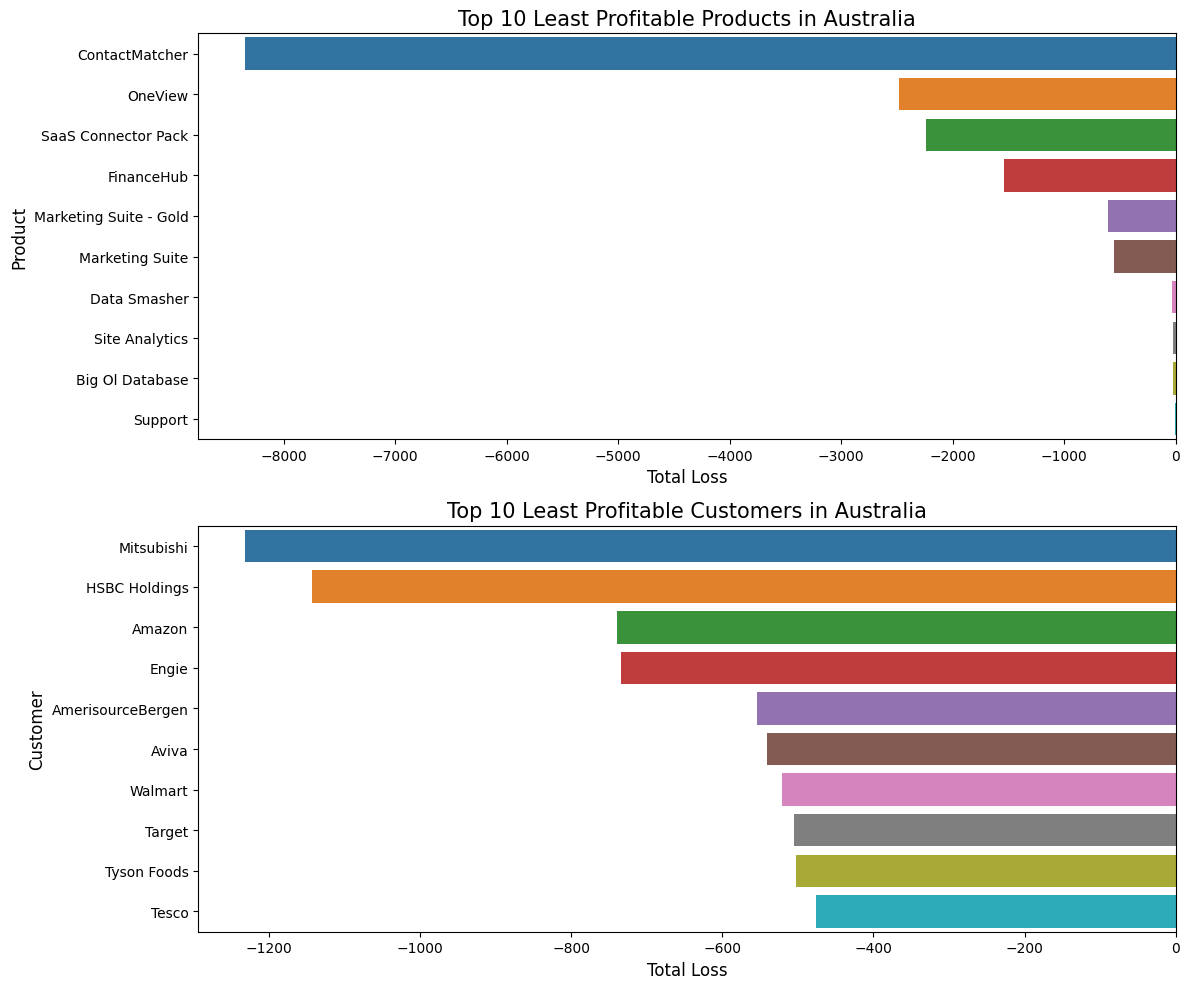

In [88]:
# Set up the matplotlib figure for subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Top 10 Least Profitable Products in Australia with a colorful palette
sns.barplot(x=total_loss_by_product_aus.values, y=total_loss_by_product_aus.index, ax=axes[0], palette="tab10")
axes[0].set_title('Top 10 Least Profitable Products in Australia', fontsize=15)
axes[0].set_xlabel('Total Loss', fontsize=12)
axes[0].set_ylabel('Product', fontsize=12)

# Top 10 Least Profitable Customers in Australia with a colorful palette
sns.barplot(x=total_loss_by_customer_aus.values, y=total_loss_by_customer_aus.index, ax=axes[1], palette="tab10")
axes[1].set_title('Top 10 Least Profitable Customers in Australia', fontsize=15)
axes[1].set_xlabel('Total Loss', fontsize=12)
axes[1].set_ylabel('Customer', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


# Visualisasi: Produk dan Pelanggan yang Menyebabkan Kerugian di Australia
1. Produk dengan Kerugian (Top 10)
ContactMatcher menonjol sebagai produk yang menyebabkan kerugian terbesar, diikuti oleh SaaS Connector Pack dan OneView.
Produk lain seperti FinanceHub, Marketing Suite, dan Marketing Suite - Gold juga mengalami kerugian, tetapi lebih kecil dibandingkan tiga produk teratas.
2. Pelanggan dengan Kerugian (Top 10)
Ford Motor mengalami kerugian terbesar di antara semua pelanggan, diikuti oleh Mitsubishi dan HSBC Holdings.
Pelanggan lain seperti Amazon, Engie, dan Walmart juga mengalami kerugian signifikan.

# produk dan pelanggan yang menguntungkan 
sekarang sebaliknya kita akan mencari pelanggan dan produk yang menguntungkan  dan visualisasinya 

In [84]:
# 1. Filter the data for Australia
data_australia_cleaned = data_dropped[data_dropped['Country'] == 'Australia']

# 2. Aggregate the data to calculate the total profit for each product and each customer in Australia
total_profit_by_product_aus = data_australia_cleaned.groupby('Product')['Profit'].sum().sort_values(ascending=False).head(10)
total_profit_by_customer_aus = data_australia_cleaned.groupby('Customer')['Profit'].sum().sort_values(ascending=False).head(10)

# 3. Select the top 10 products and top 10 customers in Australia
top_10_products_aus = total_profit_by_product_aus.head(10)
top_10_customers_aus = total_profit_by_customer_aus.head(10)

# Display the results
top_10_products_aus, top_10_customers_aus



(Product
 Alchemy                       1831.9666
 Site Analytics                1606.0585
 Support                       1072.4343
 Data Smasher                   851.0270
 Big Ol Database                326.0395
 SaaS Connector Pack - Gold     108.4640
 ChatBot Plugin                 105.2979
 Storage                         43.9949
 Marketing Suite - Gold        -213.1211
 Marketing Suite               -555.8726
 Name: Profit, dtype: float64,
 Customer
 Phillips 66                    891.1635
 Philip Morris International    467.0364
 BNP Paribas                    318.8008
 Kroger                         301.3633
 Chevron                        258.5111
 State Farm Insurance Cos.      257.2537
 Coca-Cola                      173.5623
 Verizon Communications         106.6453
 Nissan Motor                   100.4263
 Cisco Systems                   76.2734
 Name: Profit, dtype: float64)

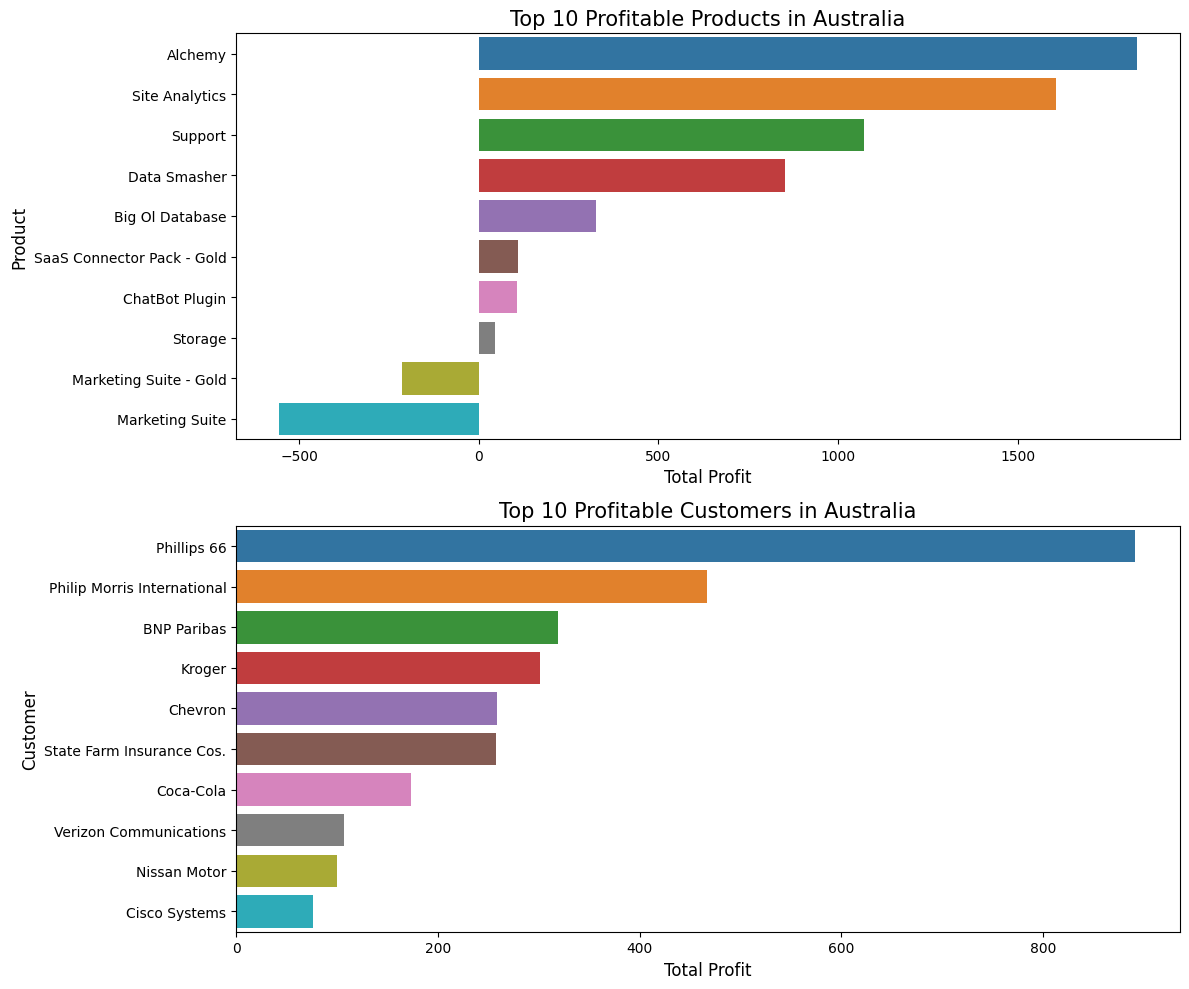

In [86]:
# Set up the matplotlib figure for subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Top 10 Profitable Products in Australia with a colorful palette
sns.barplot(x=top_10_products_aus.values, y=top_10_products_aus.index, ax=axes[0], palette="tab10")
axes[0].set_title('Top 10 Profitable Products in Australia', fontsize=15)
axes[0].set_xlabel('Total Profit', fontsize=12)
axes[0].set_ylabel('Product', fontsize=12)

# Top 10 Profitable Customers in Australia with a colorful palette
sns.barplot(x=top_10_customers_aus.values, y=top_10_customers_aus.index, ax=axes[1], palette="tab10")
axes[1].set_title('Top 10 Profitable Customers in Australia', fontsize=15)
axes[1].set_xlabel('Total Profit', fontsize=12)
axes[1].set_ylabel('Customer', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()




# Visualisasi: Produk dan Pelanggan yang Memberikan Laba Positif di Australia
1. Produk dengan Laba Positif (Top 10)
Alchemy dan Site Analytics adalah dua produk yang memberikan kontribusi laba tertinggi di Australia.
Produk lain seperti Support, Data Smasher, dan Big Ol Database juga memberikan kontribusi signifikan terhadap laba.
2. Pelanggan dengan Laba Positif (Top 10)
Phillips 66 adalah pelanggan yang memberikan kontribusi laba tertinggi, diikuti oleh Philip Morris International dan Chevron.
Pelanggan lain seperti BNP Paribas, Kroger, dan State Farm Insurance Cos. juga memberikan kontribusi positif terhadap laba.

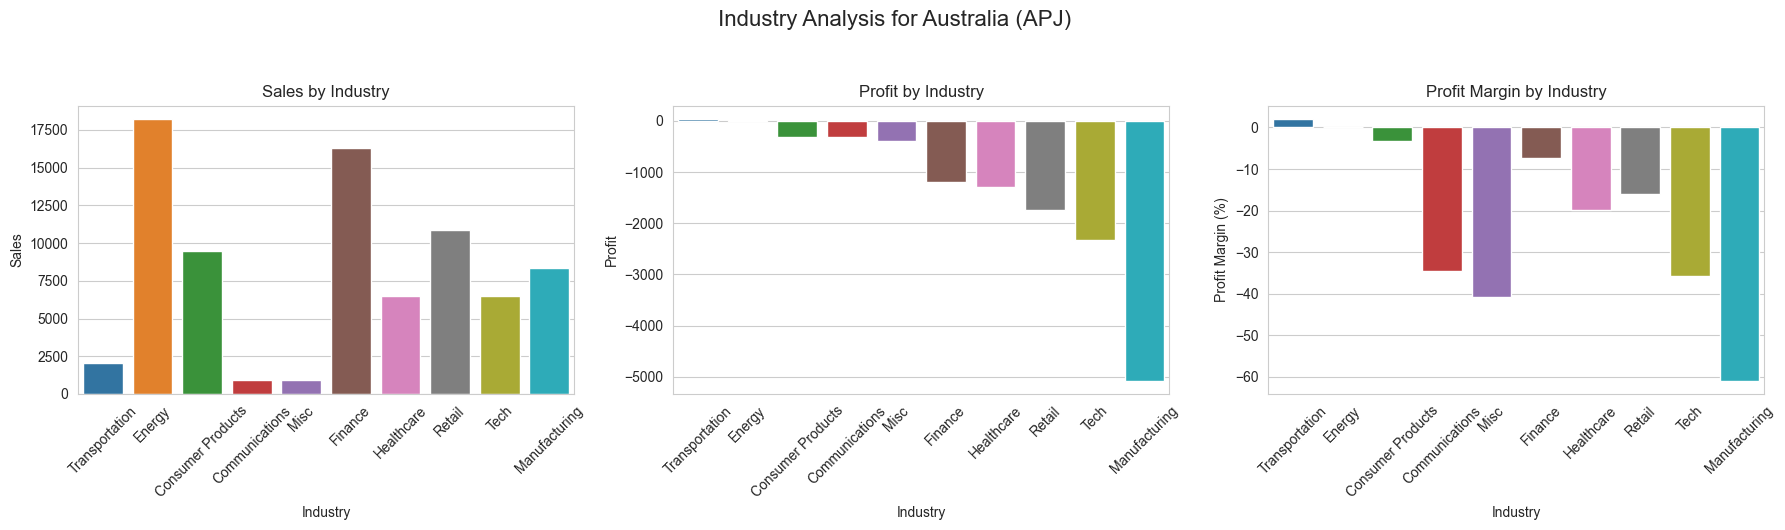

In [193]:
industry_analysis = australia_data.groupby('Industry').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values(by='Profit', ascending=False).reset_index()
industry_analysis['Profit Margin (%)'] = (industry_analysis['Profit'] / industry_analysis['Sales']) * 100



# Creating the visualizations for Industry Analysis
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
fig.suptitle('Industry Analysis for Australia (APJ)', fontsize=16, y=1.05)

# Bar Plot for Sales by Industry
sns.barplot(x='Industry', y='Sales', data=industry_analysis, ax=axes[0])
axes[0].set_title('Sales by Industry')
axes[0].tick_params(axis='x', rotation=45)

# Bar Plot for Profit by Industry
sns.barplot(x='Industry', y='Profit', data=industry_analysis, ax=axes[1])
axes[1].set_title('Profit by Industry')
axes[1].tick_params(axis='x', rotation=45)

# Bar Plot for Profit Margin by Industry
sns.barplot(x='Industry', y='Profit Margin (%)', data=industry_analysis, ax=axes[2])
axes[2].set_title('Profit Margin by Industry')
axes[2].tick_params(axis='x', rotation=45)

# Adjusting layout for readability
plt.tight_layout()
plt.show()


# observasi
3 penjualan terbesar ada di retail, energy  dan finance 
sedangkan laba negative terbesar berada di manufacturing, technology dan communication sedangkan energi dan transportasi masih positif. namun kalau dilihat dari sales penjualan transportasi dan energi ternasuk tertingg. 
di sisi lain penjualan lain yang tinggi di area manufacturing dan retail cenderung lebih menghasilkan profiy negatf.

# Data pelanggan loyalitas


In [194]:
# Langkah 1: Identifikasi Pelanggan Berdasarkan Frekuensi Transaksi

# Menghitung jumlah transaksi per pelanggan
transaction_count_by_customer = data_australia['Customer'].value_counts()

# Mengidentifikasi pelanggan yang memiliki jumlah transaksi di atas ambang batas tertentu
# Ambang batas di sini diambil sebagai mean + satu standar deviasi
threshold = transaction_count_by_customer.mean() + transaction_count_by_customer.std()
loyal_customers_by_frequency = transaction_count_by_customer[transaction_count_by_customer > threshold]

# Menampilkan hasil
loyal_customers_by_frequency.head(), len(loyal_customers_by_frequency)


(Customer
 Chevron                        19
 Philip Morris International    16
 Coca-Cola                      12
 Allianz                        12
 Walmart                        12
 Name: count, dtype: int64,
 16)

Pelanggan-pelanggan ini memiliki jumlah transaksi yang signifikan di atas rata-rata pelanggan lainnya.

In [195]:
import numpy as np

# Ensure 'Order Date' is in datetime format
data_australia['Order Date'] = pd.to_datetime(data_australia['Order Date'], errors='coerce')

# Verify the data type of 'Order Date'
order_date_data_type_after_conversion = data_australia['Order Date'].dtype

# If the conversion is successful, proceed with the calculations
if np.issubdtype(order_date_data_type_after_conversion, np.datetime64):
    # Menghitung tanggal transaksi pertama dan terakhir untuk setiap pelanggan
    first_transaction_by_customer = data_australia.groupby('Customer')['Order Date'].min()
    last_transaction_by_customer = data_australia.groupby('Customer')['Order Date'].max()

    # Menghitung durasi hubungan (dalam bulan)
    relationship_duration_by_customer = (last_transaction_by_customer - first_transaction_by_customer).dt.days / 30

    # Mengidentifikasi pelanggan yang memiliki durasi hubungan di atas ambang batas tertentu
    threshold_duration = relationship_duration_by_customer.mean() + relationship_duration_by_customer.std()
    loyal_customers_by_duration = relationship_duration_by_customer[relationship_duration_by_customer > threshold_duration]

    # Menampilkan hasil
    result = (loyal_customers_by_duration.head(), len(loyal_customers_by_duration))
else:
    result = "Conversion to datetime failed. 'Order Date' is still of type: " + str(order_date_data_type_after_conversion)

result



(Customer
 Aetna                37.200000
 AmerisourceBergen    40.000000
 Anthem               35.733333
 BNP Paribas          35.966667
 Bosch                36.333333
 Name: Order Date, dtype: float64,
 23)

# Berikut hasilnya:

Ada 23 pelanggan yang memiliki durasi hubungan lebih lama dari rata-rata + satu standar deviasi dari semua pelanggan.
Durasi hubungan (dalam bulan) untuk lima pelanggan pertama yang memenuhi kriteria tersebut ditampilkan di atas.


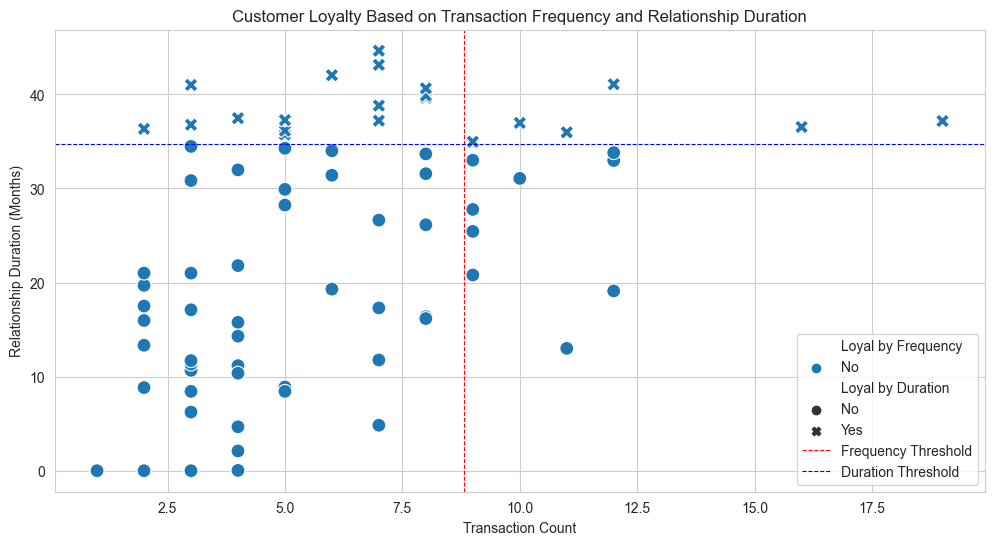

In [196]:
# Langkah 3: Visualisasi

# Menggabungkan data untuk visualisasi
loyalty_data = pd.DataFrame({
    'Transaction Count': transaction_count_by_customer,
    'Relationship Duration (Months)': relationship_duration_by_customer
}).fillna(0)

# Menandai pelanggan setia berdasarkan frekuensi transaksi dan durasi hubungan
loyalty_data['Loyal by Frequency'] = loyalty_data['Transaction Count'].apply(lambda x: 'Yes' if x in loyal_customers_by_frequency else 'No')
loyalty_data['Loyal by Duration'] = loyalty_data['Relationship Duration (Months)'].apply(lambda x: 'Yes' if x in loyal_customers_by_duration.values else 'No')

# Visualisasi
plt.figure(figsize=(12, 6))
sns.scatterplot(data=loyalty_data, x='Transaction Count', y='Relationship Duration (Months)', hue='Loyal by Frequency', style='Loyal by Duration', s=100)
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=0.8, label='Frequency Threshold')
plt.axhline(y=threshold_duration, color='blue', linestyle='--', linewidth=0.8, label='Duration Threshold')
plt.title('Customer Loyalty Based on Transaction Frequency and Relationship Duration')
plt.xlabel('Transaction Count')
plt.ylabel('Relationship Duration (Months)')
plt.grid(True)
plt.legend()
plt.show()


Observasi:
Sebagian besar pelanggan berada di bawah ambang batas untuk dianggap setia baik berdasarkan frekuensi transaksi maupun durasi hubungan.
Beberapa pelanggan dianggap setia berdasarkan salah satu kriteria tetapi tidak pada kriteria yang lain.
Ada sekelompok kecil pelanggan yang memenuhi kedua kriteria dan dianggap setia baik berdasarkan frekuensi transaksi maupun durasi hubungan.
Kesimpulan:

In [197]:
# Menghitung total profit per pelanggan
total_profit_by_customer = data_australia.groupby('Customer')['Profit'].sum()

# Mengidentifikasi pelanggan setia yang menguntungkan
profitable_loyal_customers = total_profit_by_customer[loyal_customers_by_frequency.index]
profitable_loyal_customers = profitable_loyal_customers[profitable_loyal_customers > 0].sort_values(ascending=False)

# Mengidentifikasi pelanggan setia yang merugikan
unprofitable_loyal_customers = total_profit_by_customer[loyal_customers_by_frequency.index]
unprofitable_loyal_customers = unprofitable_loyal_customers[unprofitable_loyal_customers < 0].sort_values(ascending=True)

profitable_loyal_customers, unprofitable_loyal_customers


(Customer
 Philip Morris International    467.0364
 Chevron                        342.4971
 BNP Paribas                    318.8008
 Coca-Cola                      173.5623
 Prudential Financial            51.8181
 PepsiCo                         22.2919
 Name: Profit, dtype: float64,
 Customer
 HSBC Holdings         -1074.5009
 Walmart                -490.2531
 Tyson Foods            -486.3957
 Target                 -329.9782
 American Express       -286.6779
 Allianz                -188.8088
 BMW                     -23.8046
 Valero Energy           -19.9123
 Goldman Sachs Group      -1.1452
 Fannie Mae               -0.8919
 Name: Profit, dtype: float64)

ada 6 pelanggan setia yang memberikan keuntungan secara konsisten yang dimana  Phillip morris International menjadi yang terbesar. Lalu ada 10 pelanggan yang konsisten memberikan kerugian yang dipimpin oleh HSBC holding.

In [198]:
# Grouping data by Segment and aggregating Sales and Profit
segment_analysis = australia_data.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Calculating Profit Margin for each Segment
segment_analysis['Profit Margin (%)'] = (segment_analysis['Profit'] / segment_analysis['Sales']) * 100

# Identifying the most profitable and the most loss-making segments
most_profitable_segment = segment_analysis.loc[segment_analysis['Profit'].idxmax()]
most_loss_making_segment = segment_analysis.loc[segment_analysis['Profit'].idxmin()]

# Displaying the results
segment_analysis, most_profitable_segment, most_loss_making_segment


(      Segment      Sales     Profit  Profit Margin (%)
 0  Enterprise  18999.626 -2644.1119         -13.916652
 1         SMB  45182.195 -5470.8934         -12.108516
 2   Strategic  15984.280 -4492.8817         -28.108127,
 Segment              Enterprise
 Sales                 18999.626
 Profit               -2644.1119
 Profit Margin (%)    -13.916652
 Name: 0, dtype: object,
 Segment                    SMB
 Sales                45182.195
 Profit              -5470.8934
 Profit Margin (%)   -12.108516
 Name: 1, dtype: object)

# PELANGGAN YANG MEMANFAATKAN DISKON SECARA BERLEBIHAN 
salah satu hal yang perlu diperhatikan juga adalah adanya pelanggan yang memaksimalkan diskon secara berlebihan sehinggan berkontribusi terhadap kerugian langsung.

In [199]:
# Mengambil data transaksi untuk pelanggan setia yang merugikan
unprofitable_loyal_customer_transactions = data_australia[data_australia['Customer'].isin(unprofitable_loyal_customers.index)]

# Menambahkan informasi tentang apakah setiap transaksi melibatkan diskon atau tidak
unprofitable_loyal_customer_transactions['Has Discount'] = unprofitable_loyal_customer_transactions['Discount'] > 0

# Menghitung persentase transaksi yang melibatkan diskon untuk setiap pelanggan
discount_percentage_by_customer = unprofitable_loyal_customer_transactions.groupby('Customer')['Has Discount'].mean() * 100

# Menampilkan hasil
discount_percentage_by_customer.sort_values(ascending=False)


Customer
Allianz                100.0
American Express       100.0
BMW                    100.0
Fannie Mae             100.0
Goldman Sachs Group    100.0
HSBC Holdings          100.0
Target                 100.0
Tyson Foods            100.0
Valero Energy          100.0
Walmart                100.0
Name: Has Discount, dtype: float64

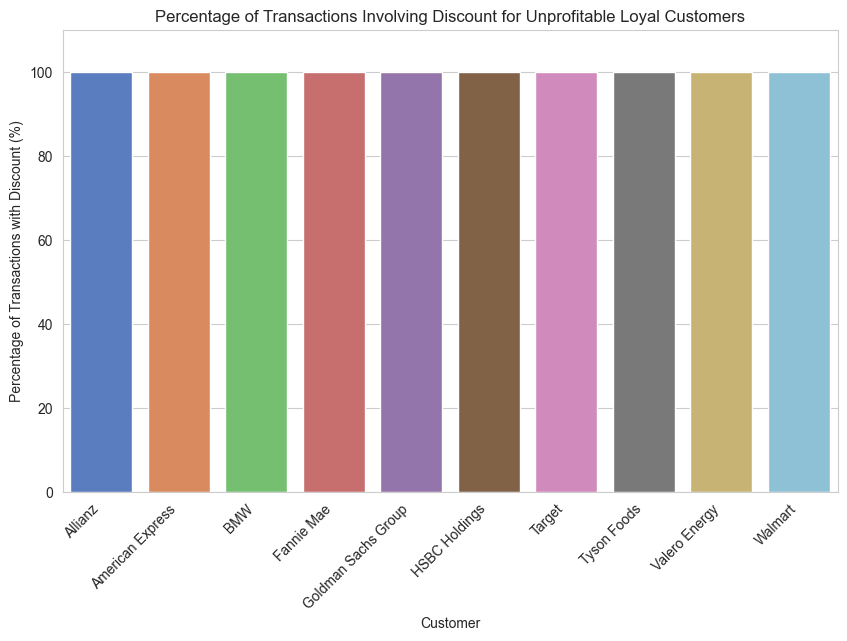

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran plot
plt.figure(figsize=(10, 6))

# Membuat bar plot untuk persentase transaksi dengan diskon per pelanggan
sns.barplot(x=discount_percentage_by_customer.index, y=discount_percentage_by_customer.values, palette='muted')

# Menambahkan label dan judul
plt.ylabel('Percentage of Transactions with Discount (%)')
plt.xlabel('Customer')
plt.title('Percentage of Transactions Involving Discount for Unprofitable Loyal Customers')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 110)  # Menetapkan batas y-axis agar lebih mudah membaca

# Menampilkan plot
plt.show()


Semua batang mencapai 100%, yang menunjukkan bahwa setiap transaksi yang dilakukan oleh pelanggan-pelanggan ini melibatkan diskon. Ini adalah indikasi kuat bahwa kebijakan diskon mungkin memiliki dampak signifikan terhadap profitabilitas perusahaan, khususnya terkait dengan pelanggan-pelanggan ini.

# Segmen

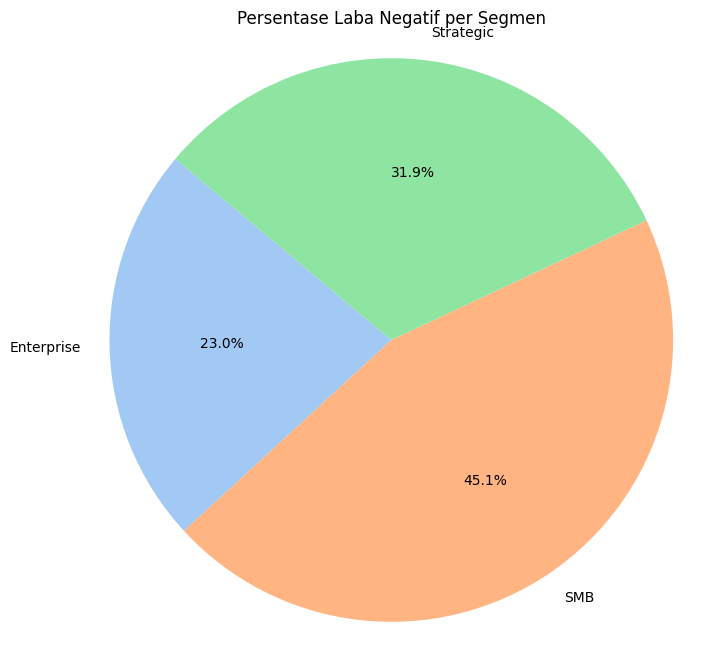

In [52]:
laba_negatif_per_segmen = data_australia[data_australia['Profit'] < 0].groupby('Segment')['Profit'].sum()


# Menghitung persentase laba negatif untuk setiap segmen
total_laba_negatif = laba_negatif_per_segmen.sum()
persentase_laba_negatif_per_segmen = (laba_negatif_per_segmen / total_laba_negatif) * 100

# Membuat visualisasi pie chart
plt.figure(figsize=(8, 8))
plt.pie(persentase_laba_negatif_per_segmen, labels=persentase_laba_negatif_per_segmen.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('pastel'))
plt.title('Persentase Laba Negatif per Segmen')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


segmen smb merupakan yang paling sering membeli produk diikuti oleh enterprise dan strategic.

# FREKUENSI PEMBELIAN

In [202]:

# Langkah 1: Penghitungan Statistik Deskriptif untuk Ukuran Transaksi dan Frekuensi Pembelian

# Menghitung total pembelian dan total transaksi per pelanggan
customer_stats = data_australia.groupby('Contact Name').agg(
    Total_Purchases=('Sales', 'sum'),
    Total_Transactions=('Order ID', 'count')
).reset_index()

# Menghitung statistik deskriptif
descriptive_stats = customer_stats[['Total_Purchases', 'Total_Transactions']].describe()
descriptive_stats


,Total_Purchases,Total_Transactions
count,237.000000,237.000000
mean,338.253591,2.075949
std,517.618342,1.459384
min,0.836000,1.000000
25%,34.240000,1.000000
50%,147.168000,2.000000
75%,388.058000,3.000000
max,3172.707000,10.000000


# Total Purchases (Ukuran Transaksi)

Rata-rata: $338.56

Standar Deviasi: $517.12

Minimum: $0.84

Kuartil Pertama (25%): $34.24

Median (50%): $147.2

Kuartil Ketiga (75%): $388.1

Maksimum: $3172.71

# Total Transactions (Frekuensi Pembelian)

Rata-rata: 2.07

Standar Deviasi: 1.46

Minimum: 1

Kuartil Pertama (25%): 1

Median (50%): 2

Kuartil Ketiga (75%): 3

Maksimum: 10

# ANALISIS TAHUNAN 

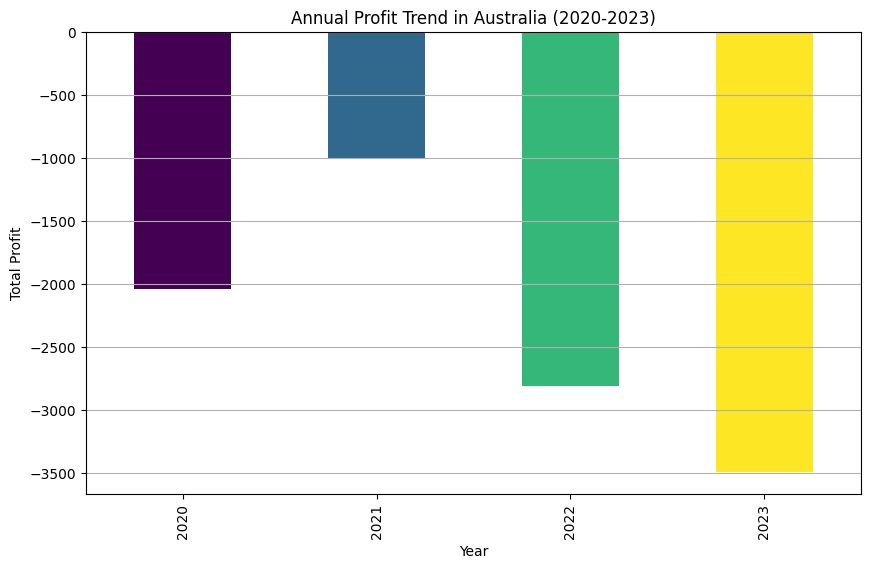

Year
2020   -2043.7367
2021   -1009.4964
2022   -2809.0939
2023   -3491.5902
Freq: A-DEC, Name: Profit, dtype: float64

In [91]:
# Langkah 2: Analisis Tahunan

import matplotlib.pyplot as plt
import numpy as np

# Menambahkan kolom 'Year' ke dataset
data_australia_cleaned['Year'] = data_australia_cleaned['Order Date'].dt.to_period('Y')

# Menghitung total laba per tahun
annual_profit_australia = data_australia_cleaned.groupby('Year')['Profit'].sum()

# Membuat variasi warna gradient
colors = plt.cm.viridis(np.linspace(0, 1, len(annual_profit_australia)))

# Visualisasi hasil
plt.figure(figsize=(10, 6))
annual_profit_australia.plot(kind='bar', color=colors)
plt.title('Annual Profit Trend in Australia (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.grid(axis='y')
plt.show()

# Menampilkan data untuk analisis
annual_profit_australia


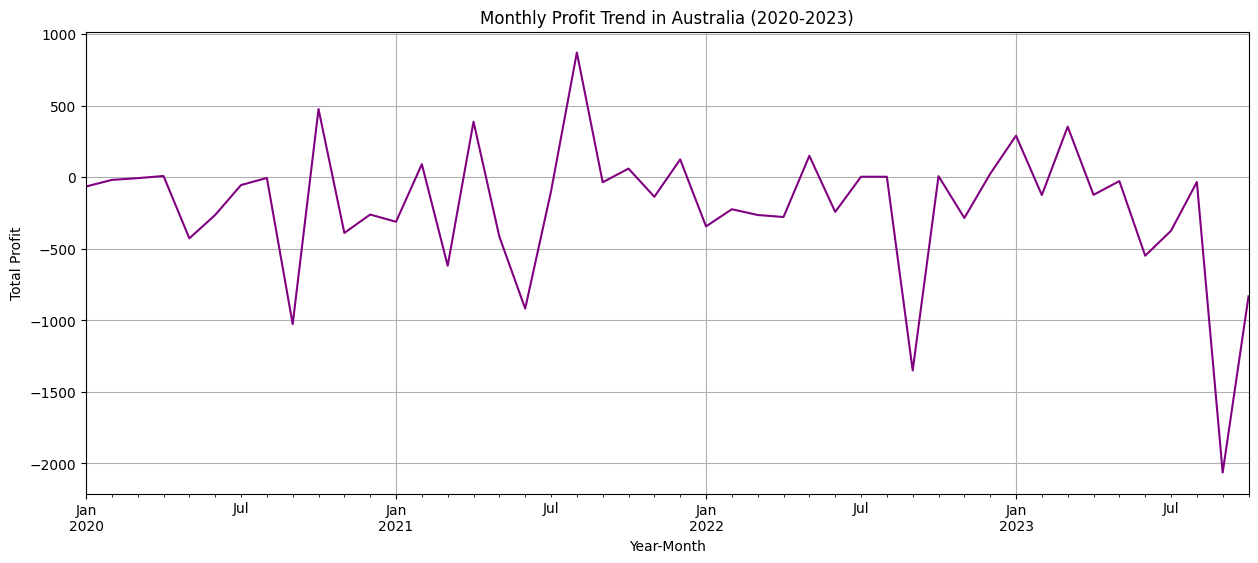

Year-Month
2023-06    -549.1683
2023-07    -375.0266
2023-08     -34.5730
2023-09   -2063.6810
2023-10    -832.8111
Freq: M, Name: Profit, dtype: float64

In [120]:
# Langkah 1: Analisis Bulanan
data_australia_cleaned['Order Date'] = pd.to_datetime(data_australia_cleaned['Order Date'])

# Menambahkan kolom 'Year-Month' ke dataset
data_australia_cleaned['Year-Month'] = data_australia_cleaned['Order Date'].dt.to_period('M')

# Menghitung total laba per bulan
monthly_profit_australia = data_australia_cleaned.groupby('Year-Month')['Profit'].sum()

# Visualisasi hasil
plt.figure(figsize=(15, 6))
monthly_profit_australia.plot(color='purple')
plt.title('Monthly Profit Trend in Australia (2020-2023)')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

# Menampilkan beberapa data terakhir untuk melihat tren terkini
monthly_profit_australia.tail()


dalam melihat timeframe skala tahunan terjadi peningkatan pada tahun kedua namun jatuh pada tahun terakhir. 

In [121]:
# Mengekstrak tahun dari 'Order Date' dan membuat kolom baru 'Year'
data_australia_cleaned['Year'] = data_australia_cleaned['Order Date'].dt.year

# Mengelompokkan data berdasarkan tahun
annual_data = data_australia_cleaned.groupby('Year').agg(Total_Sales=('Sales', 'sum'), Total_Profit=('Profit', 'sum')).reset_index()

# Menampilkan data tahunan
annual_data


,Year,Total_Sales,Total_Profit
0,2020,16202.707,-2043.7367
1,2021,18578.064,-1009.4964
2,2022,21033.719,-2809.0939
3,2023,18669.310,-3491.5902


laba negatif selama 4 tahun namun terjadi peningkatan rugi pada tahun terakhir

In [122]:
# Langkah 1: Filter Data untuk Laba Negatif
data_australia_negative_profit = data_australia_cleaned[data_australia['Profit'] < 0]

# Menampilkan 5 baris pertama dari data dengan laba negatif
data_australia_negative_profit.head()


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Segment,Product,License,Sales,Quantity,Discount,Profit,YearMonth,Year,Year-Month
66,67,APJ-2021-164175,2021-04-30,20210430,Eric McLean,Australia,Sydney,APJ,ANZ,Abbott Laboratories,...,Enterprise,FinanceHub,6QHQUNX985,213.115,5,0.3,-15.2225,2021-04,2021,2021-04
100,101,APJ-2022-158568,2022-08-30,20220830,Gavin Walsh,Australia,Sydney,APJ,ANZ,Philip Morris International,...,Enterprise,Data Smasher,LW1M6UDC4B,95.976,3,0.2,-10.7973,2022-08,2022,2022-08
101,102,APJ-2022-158568,2022-08-30,20220830,Gavin Walsh,Australia,Sydney,APJ,ANZ,Philip Morris International,...,Enterprise,ContactMatcher,WCITXGLF0J,1.788,3,0.8,-3.0396,2022-08,2022,2022-08
125,126,APJ-2020-134614,2020-09-20,20200920,Sally Berry,Australia,Geelong,APJ,ANZ,Tesco,...,SMB,ContactMatcher,NR9RLNIDDN,617.700,6,0.5,-407.6820,2020-09,2020,2020-09
174,175,APJ-2020-100853,2020-09-14,20200914,Gabrielle Ogden,Australia,Sydney,APJ,ANZ,Royal Dutch Shell,...,Strategic,OneView,BTUYY86TIA,52.448,2,0.8,-131.1200,2020-09,2020,2020-09


In [208]:
# Langkah 3: Timestamp Pembelian Produk
timestamp_negative_profit = data_australia_negative_profit[['Product', 'Order Date', 'Profit']].sort_values(by='Profit')

# Mengambil timestamp pembelian untuk produk "ContactMatcher", "OneView", dan "SaaS Connector Pack"
timestamp_contact_matcher = timestamp_negative_profit[timestamp_negative_profit['Product'] == 'ContactMatcher']
timestamp_one_view = timestamp_negative_profit[timestamp_negative_profit['Product'] == 'OneView']
timestamp_saas_connector_pack = timestamp_negative_profit[timestamp_negative_profit['Product'] == 'SaaS Connector Pack']

# Menampilkan timestamp pembelian untuk "ContactMatcher"
timestamp_contact_matcher.head()


,Product,Order Date,Profit
4991,ContactMatcher,2023-12-08,-2929.4845
2846,ContactMatcher,2023-09-11,-1143.8910
6262,ContactMatcher,2022-09-25,-729.9138
1713,ContactMatcher,2023-09-09,-566.5625
8926,ContactMatcher,2022-01-30,-538.4460


In [209]:
# Konversi 'Order Date' ke tipe data datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Mendapatkan tanggal terakhir dalam dataset
last_date = data['Order Date'].max()

# Menghitung satu tahun sebelum tanggal terakhir
one_year_ago = last_date - pd.DateOffset(years=1)

# Filter data untuk transaksi yang terjadi pada tahun terakhir
data_last_year = data[data['Order Date'] > one_year_ago]

# Menampilkan informasi dasar dari data yang difilter
data_last_year_info = data_last_year.info()
last_date, one_year_ago, data_last_year_info



<class 'pandas.core.frame.DataFrame'>
Index: 3319 entries, 12 to 9993
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        3319 non-null   int64         
 1   Order ID      3319 non-null   object        
 2   Order Date    3319 non-null   datetime64[ns]
 3   Date Key      3319 non-null   int64         
 4   Contact Name  3319 non-null   object        
 5   Country       3319 non-null   object        
 6   City          3319 non-null   object        
 7   Region        3319 non-null   object        
 8   Subregion     3319 non-null   object        
 9   Customer      3319 non-null   object        
 10  Customer ID   3319 non-null   int64         
 11  Industry      3319 non-null   object        
 12  Segment       3319 non-null   object        
 13  Product       3319 non-null   object        
 14  License       3319 non-null   object        
 15  Sales         3319 non-null   float64     

(Timestamp('2023-12-31 00:00:00'), Timestamp('2022-12-31 00:00:00'), None)

In [ ]:
loss_products = data_last_year.groupby(['Product', 'Customer', 'Industry', 'Segment'])['Profit'].sum().reset_index()
loss_products = loss_products[loss_products['Profit'] < 0].sort_values(by='Profit')
loss_products


,Product,Customer,Industry,Segment,Profit
32,Big Ol Database,Costco Wholesale,Retail,Strategic,-3839.9904
33,Big Ol Database,FedEx,Transportation,Enterprise,-3399.9800
274,ContactMatcher,Ford Motor,Manufacturing,Strategic,-2900.8624
295,ContactMatcher,Itochu,Finance,SMB,-2280.8160
314,ContactMatcher,Merck,Healthcare,Strategic,-1431.3903
...,...,...,...,...,...
1476,Storage,Tyson Foods,Consumer Products,SMB,-0.6048
1072,SaaS Connector Pack,China National Petroleum,Energy,Enterprise,-0.3398
823,Marketing Suite - Gold,Exxon Mobil,Energy,SMB,-0.2098
213,ContactMatcher,American Express,Finance,Strategic,-0.1366


# kota yang paling menguntungkan 

In [ ]:
# Group the data by City and calculate the total profit for each city
city_profit = australia_data.groupby('City')['Profit'].sum().sort_values(ascending=False)

# Get the city with the highest total profit
city_highest_profit = city_profit.idxmax()
highest_profit = city_profit.max()

city_profit, city_highest_profit, highest_profit


(City
 Perth           53.6582
 Canberra        28.1237
 Gold Coast     -39.6567
 Wollongong    -106.3457
 Hobart        -215.7739
 Adelaide      -286.2637
 Brisbane      -500.3038
 Geelong       -967.0211
 Melbourne    -3919.7352
 Sydney       -6654.5688
 Name: Profit, dtype: float64,
 'Perth',
 53.65819999999999)


Perth adalah kota dengan laba total tertinggi, meskipun nilainya tidak terlalu besar, ini menunjukkan bahwa operasi di Perth menghasilkan laba bersih.
Sebaliknya, Melbourne dan Sydney menunjukkan laba total yang sangat negatif, menandakan bahwa ada masalah serius dalam operasi atau strategi penjualan di kedua kota ini yang perlu ditangani.

# analisis multivariat
kita akan melakukan analisis dengan cara menggabungkan beberapa faktor sekaligus

In [163]:
city_product_analysis = data_australia_cleaned.groupby(['City', 'Product']).agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

city_product_analysis
sorted_city_product = city_product_analysis.sort_values(by=['City', 'Profit'], ascending=[True, False])
top_3_products_per_city = sorted_city_product.groupby('City').head(3)


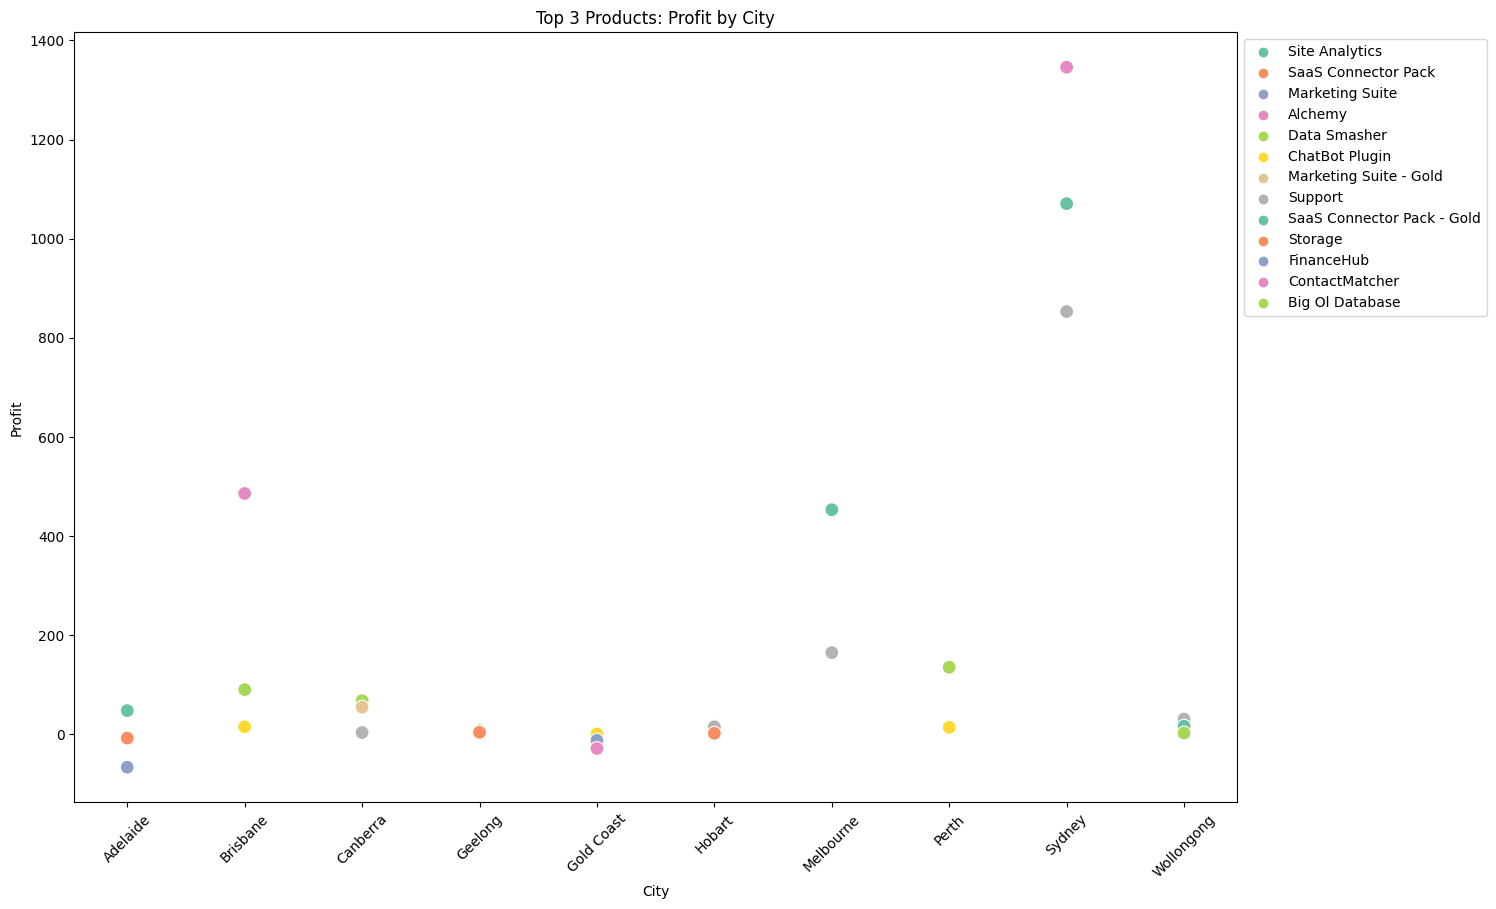

In [165]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='City', y='Profit', hue='Product', data=top_3_products_per_city, palette='Set2', s=100)
plt.title('Top 3 Products: Profit by City')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



sydney menjadi penjual dengan laba tertinngi khusus contactmatcher, SAAS connector 

# kota dengan pelanggan 


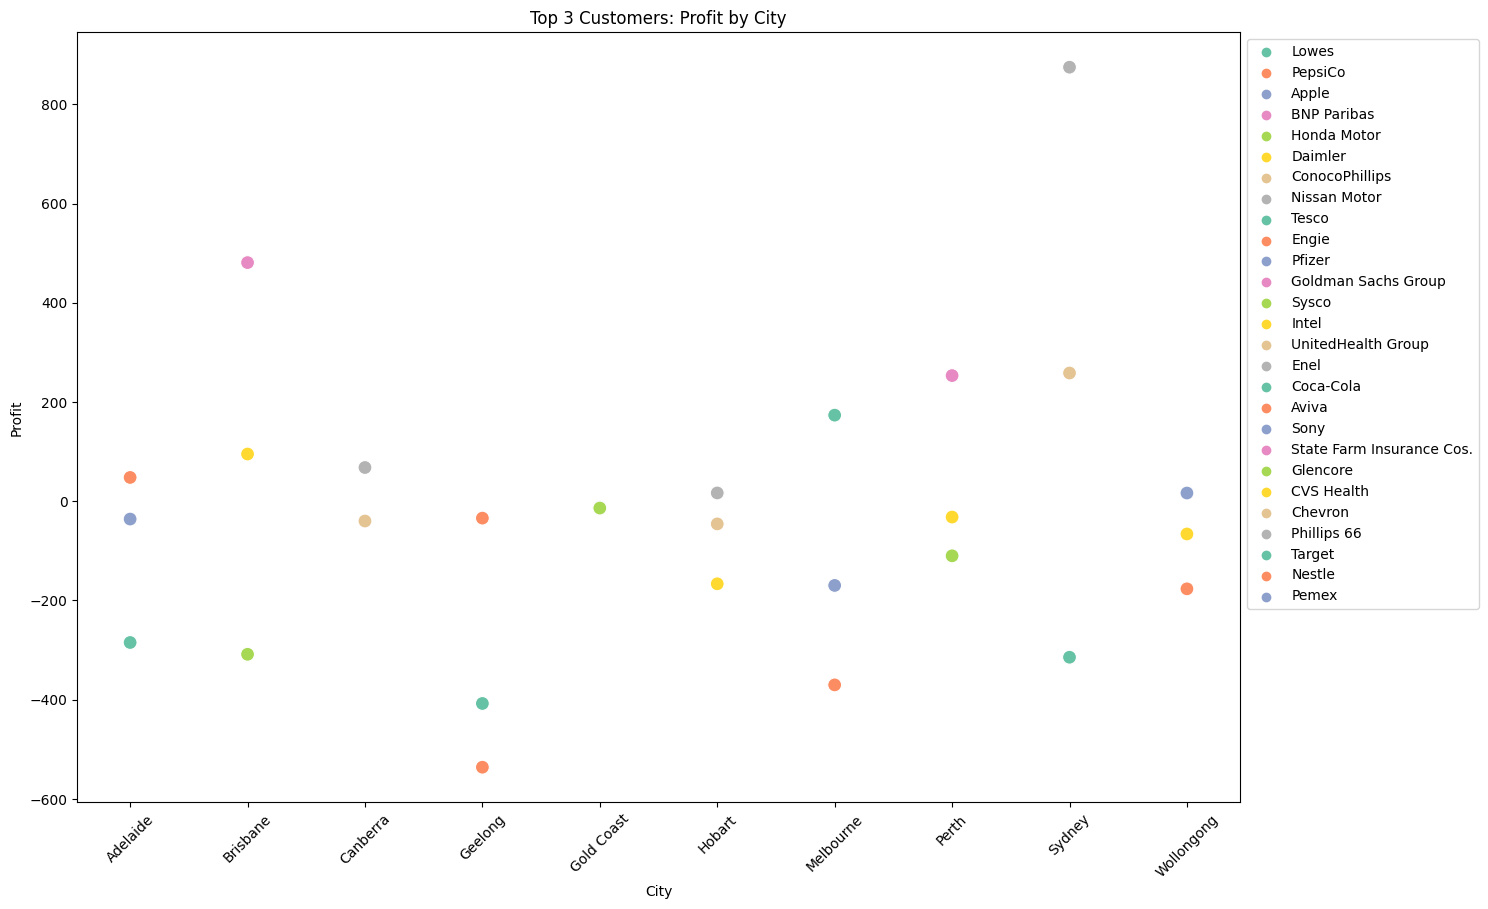

In [160]:
city_customer_analysis = data_australia_cleaned.groupby(['City', 'Customer']).agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()
plt.figure(figsize=(15, 10))
sns.scatterplot(x='City', y='Profit', hue='Customer', data=top_3_customers_per_city, palette='Set2', s=100)
plt.title('Top 3 Customers: Profit by City')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



# produk dan pelanggan 


In [169]:
product_customer_analysis = data_australia_cleaned.groupby(['Product', 'Customer']).agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

sorted_product_customer = product_customer_analysis.sort_values(by=['Product', 'Profit'], ascending=[True, False])
top_3_customers_per_product = sorted_product_customer.groupby('Product').head(3)


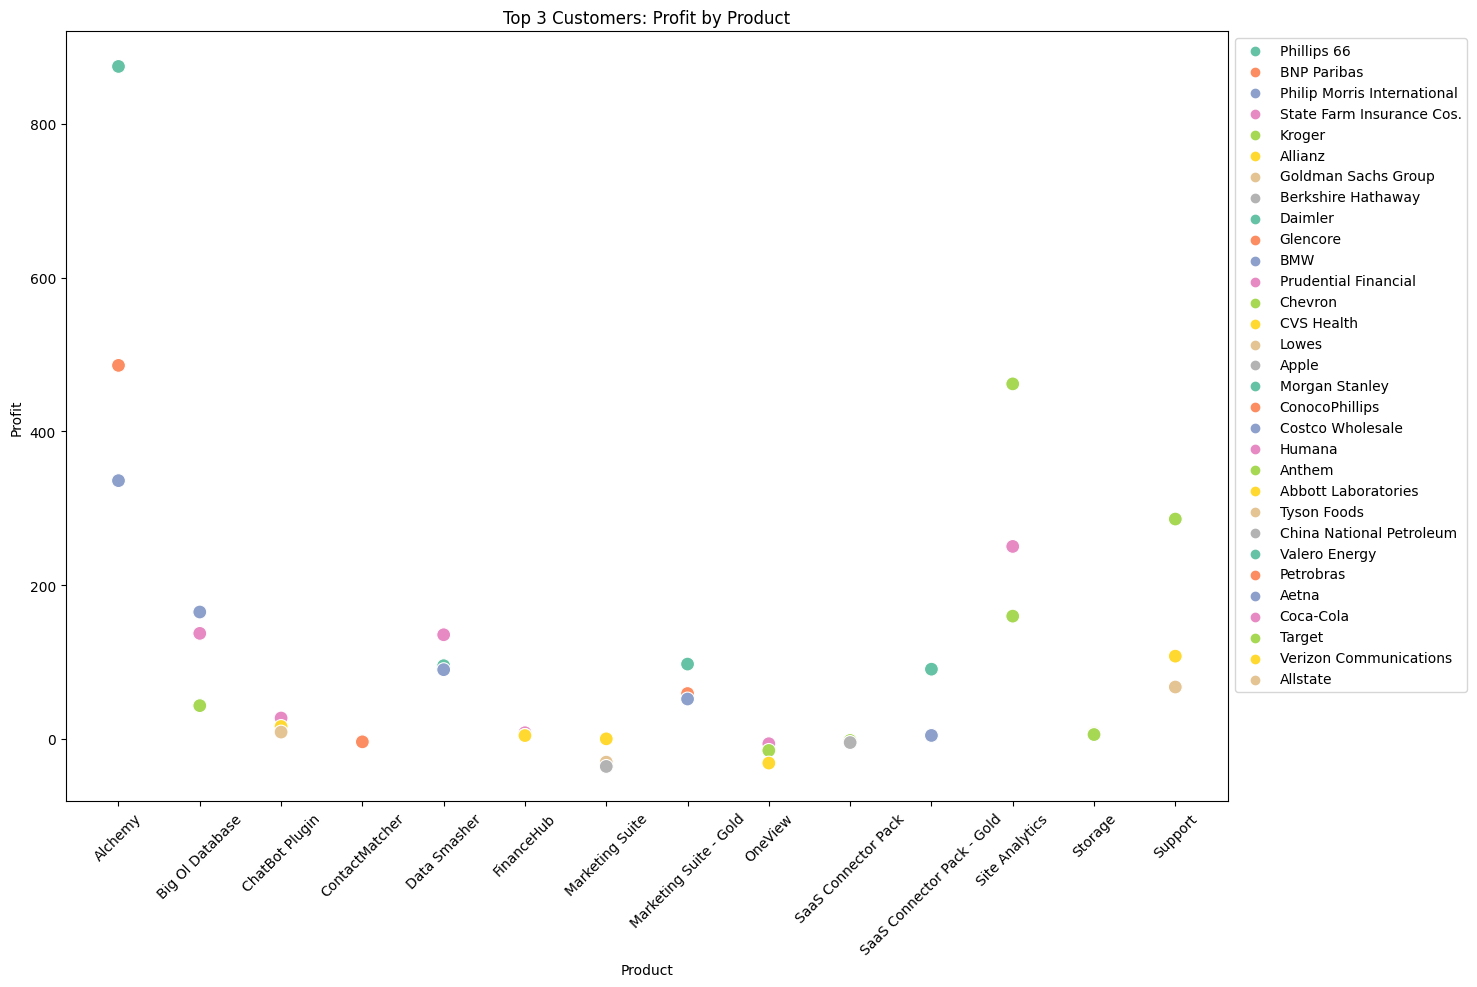

In [170]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Product', y='Profit', hue='Customer', data=top_3_customers_per_product, palette='Set2', s=100)
plt.title('Top 3 Customers: Profit by Product')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# kesimpulan
 # 1. dari segi pelanggan
pelanggan yang mengakibatkan kerugian selalu menggunakan diskon untuk membeli produk dalam jumlah besar, 
pelanggan yang mengakibatkan kerugian berasal dari segment strategic ketimbang SMB yang membeli dalam jumlah besar. 
pelanggan yang mengakibatkan untung berasal dari chevron dan phillips lalu segmen SMB mempunyai profit margin yang lumayan tinggi
# 2. dari segi industri 
cuma ada 2 jenis industri yang menguntungkan yaitu transportasi dan energi
# 3. dari segi produk 
produk seperti matchmaker berkontribusi kerugian yang sangat besar, bahkan produk untung seoperti alchemy , site analytics tidak mampu menutup kerugian
# 4. dari timeframe 
ada bagian dari 2021 hinga pertengahan ke 2022 yang membuat profit sempat positif, namun terjadi penurunan tajam di tahun terakhir.
# 5 dari korelasi pearson
 hubungan variabel laba dengan diskon memilik negatif yang cukup kuat sedangkan hubungan laba dengan  yang lainnya negatif tapi lemah
 # 6 dari kota
 perth  dan canberra cuma 2 kota yang positif. Yang lainnya negatif terutama mellbourne.
 # 7 dari pemanfaatan diskon 
 ada 7 pelanggan yang memanfaatkan diskon dengan membeli semua barang pada saat diskon sehingga menciptakan kerugian
 # 8 loyalitas
 Ada 23 pelanggan yang sering kerap melakukan pembelian dengan durasi yang lama
 # 9 segmen 
 semua segmen mengalami kerugian dan segmen SMB yang paling besar.
 
 
 


# REKOMENDASI
# # 1. Peningkatan Hubungan dengan Pelanggan Menguntungkan dan menganalisa pelanggan yang merugikan
Program Loyalitas: Kembangkan atau tingkatkan program loyalitas untuk memperkuat hubungan dengan pelanggan yang menguntungkan.
Penawaran Khusus: Pertimbangkan untuk memberikan penawaran khusus atau insentif tambahan kepada pelanggan yang paling menguntungkan untuk mendorong retensi dan peningkatan pembelian.
diversifikasi produk: Upayakan untuk mempertahankan dan meningkatkan hubungan dengan pelanggan-pelanggan ini. Mungkin ada potensi untuk menawarkan produk atau layanan tambahan kepada mereka.
Pelanggan Merugikan: Perlu dilakukan evaluasi mendalam untuk memahami penyebab kerugian dari interaksi dengan pelanggan-pelanggan ini. Apakah ada masalah spesifik dengan produk atau layanan yang mereka beli? Apakah ada potensi untuk mengubah strategi penjualan atau pelayanan untuk mengubah situasi ini menjadi lebih menguntungkan?


# 2. Manajemen Diskon:

Evaluasi Strategi Diskon: Evaluasi kembali strategi pemberian diskon untuk memastikan bahwa diskon tidak merugikan laba secara signifikan.
Hubungan Diskon dengan Volume Penjualan: semenjak korelasi koeefisian
# 3. Mitigasi Produk dan Pelanggan yang Merugikan:

Evaluasi Produk yang Merugikan: Lakukan evaluasi menyeluruh pada produk yang mengalami kerugian, seperti "ContactMatcher" dan "SaaS Connector Pack", dan tentukan apakah perubahan strategi atau penghentian produk diperlukan.
Tinjau Ulang Hubungan dengan Pelanggan Merugikan: Identifikasi dan tinjau ulang hubungan dengan pelanggan yang menyebabkan kerugian, seperti "Ford Motor" dan "Mitsubishi", untuk memahami penyebab kerugian dan mencari solusi.
# 4. Peningkatan Laba di Seluruh Produk dan Segmen:

Diversifikasi Produk: Pertimbangkan untuk memperkenalkan produk baru atau memperluas lini produk untuk menarik segmen pelanggan yang lebih luas.
Optimasi Harga: Analisis elastisitas harga untuk mengoptimalkan penetapan harga dan memaksimalkan laba.

# 5. fokus industri dan lakukan perlakuan khusus

fokus ke penjualan ke area transportasi dan negeri. 2 faktor ini cukup unik karena mamp

# 6 fokus kota
sering lakukan marketing ke produk di kota yang memiliki perth.
# 7 pelanggan yang memanfaatkan diskon
bisa menurunkan atau memberi produk yang lain tapi bisa memberi profit lebih

In [48]:
data_dropped.to_csv('D:\\bootcamp\\capstone 2 ( data analisis)\\dara bersoh\\Saas-salesbersih.csv', index=False)